In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# I. LOAD DATA

In [3]:
train0 = pd.read_csv('./Data/train.csv') 

In [4]:
train0.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
print('The number of rows: ', train0.shape[0])

The number of rows:  1460


In [6]:
print('The datatypes in the dataframe:')
train0.dtypes.unique()

The datatypes in the dataframe:


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
#list(train0)

## Create some new variables

In [8]:
# Create New Numerical Variables
train0['AgeHome'] = train0['YrSold'] - train0['YearBuilt']
train0['YrsSinceRemodel'] = train0['YrSold'] - train0['YearRemodAdd']
train0['Num_Bathrms'] = train0['FullBath'] + train0['HalfBath'] 

In [9]:
# Ensure these variabes are categorical
train0['MSSubClass'] = train0['MSSubClass'].astype(str)
train0['MoSold'] = train0['MoSold'].astype(str)
train0['YrSold'] = train0['YrSold'].astype(str)
train0['YearBuilt'] = train0['YearBuilt'].astype(str)

# II. EXPLORATORY DATA ANALYSIS & VISUALIZATIONS

### Look at the Output/Dependent Variable (Y) - SalePrice 🎯

In [10]:
zthres = 4
# Which indices have z-scores >  zthres
zvals = stats.zscore(train0['SalePrice'])
indx = np.where(abs(zvals) > 4.0)

print('The indices with z-scores > ', zthres,':')
print(indx)
print('\nThose z-scores: ')
print(zvals[indx])
print('\nNumber of indices:',len(indx[0]))

The indices with z-scores >  4 :
(array([ 178,  440,  691,  769,  803,  898, 1046, 1169, 1182]),)

Those z-scores: 
[4.04098249 4.71041276 7.22881942 4.49634819 5.06214602 5.42383959
 4.73032076 5.59185509 7.10289909]

Number of indices: 9


25th percentile: 129975.0
50th percentile / Median SalePrice: 163000.0
75th percentile: 214000.0
# of Missing Rows:  0  out of  1460


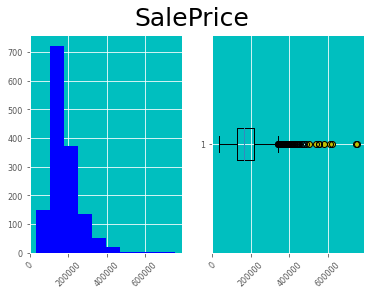

In [11]:
# The Distribution of the OUTPUT/DEPENDENT variable

fig, axs = plt.subplots(1,2)
fig.suptitle('SalePrice',fontsize=25)
axs[1].boxplot(train0['SalePrice'],vert=False)
axs[1].tick_params(axis='x', rotation = 45)
axs[1].set_facecolor('c')

axs[1].scatter(train0.loc[indx,'SalePrice'], 
              [np.ones(len(indx[0]))],color='y') # large z-scores 

axs[0].hist(train0['SalePrice'],color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_facecolor('c')

print('25th percentile:',train0['SalePrice'].quantile(.25))
print('50th percentile / Median SalePrice:',train0['SalePrice'].median())
print('75th percentile:',train0['SalePrice'].quantile(.75))
print('# of Missing Rows: ', train0['SalePrice'].isna().sum(), 
    ' out of ',len(train0['SalePrice']))

In [12]:
train0['log_SalePrice'] = np.log(train0['SalePrice'])

SalePrice is right skewed (left plot).
For the output/dependent variable, the log of SalePrice taken.
This is so the residuals of a linear model would be normal.


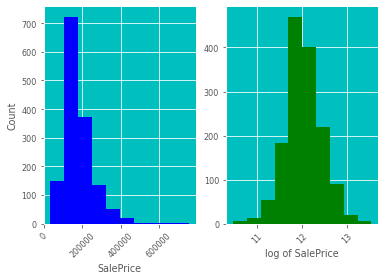

In [13]:
fig, axs = plt.subplots(1,2)   
axs[0].hist(train0['SalePrice'],color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('SalePrice')
axs[0].set_facecolor('c')

axs[1].hist(train0['log_SalePrice'],color='g')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('log of SalePrice')
axs[1].set_facecolor('c')

print('SalePrice is right skewed (left plot).')
print('For the output/dependent variable, the log of SalePrice taken.')
print('This is so the residuals of a linear model would be normal.')

## A. The Numeric Variables

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train0.select_dtypes(include=numerics)
numlist = list(num_train)
print(len(numlist),' numeric variables')
print(numlist)

38  numeric variables
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms', 'log_SalePrice']


### The Independent Variable (Xs) 

In [15]:
# correlation threshold, used to highlight particular figures 
corr_thrshld = 0.3

<ipython-input-16-a30b8e3413ea>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


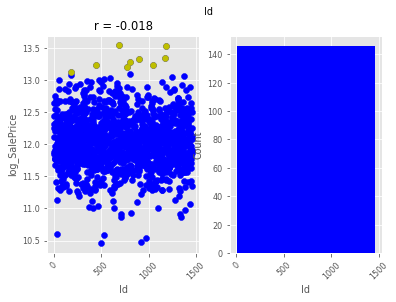

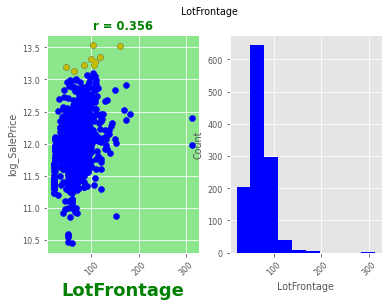

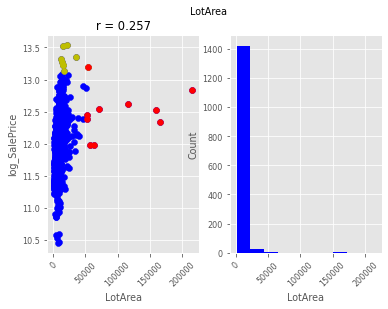

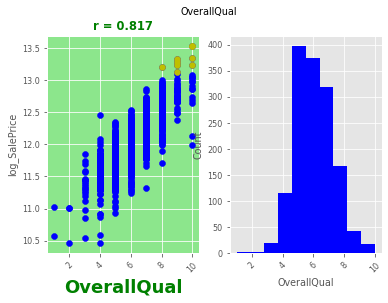

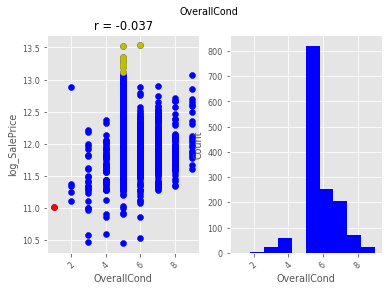

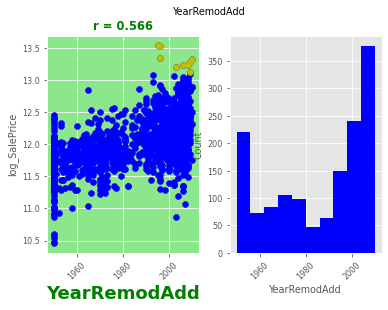

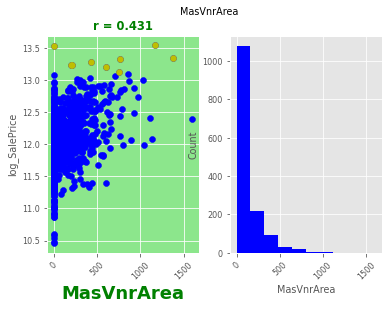

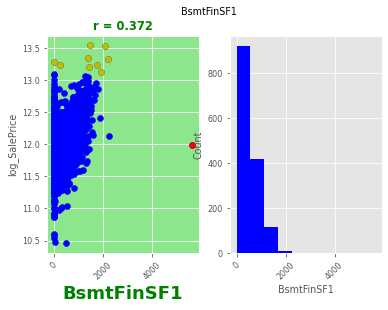

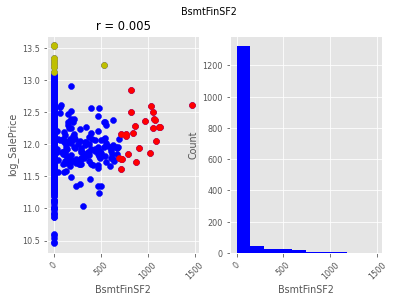

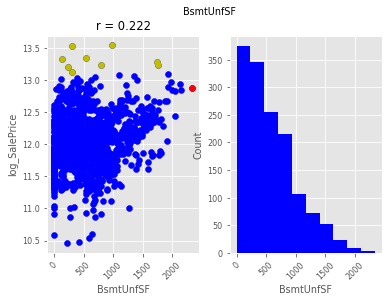

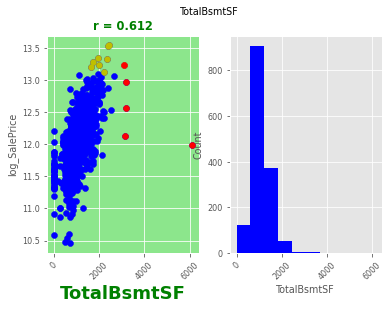

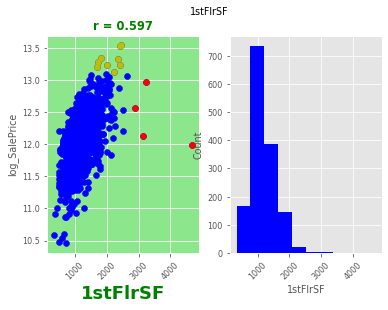

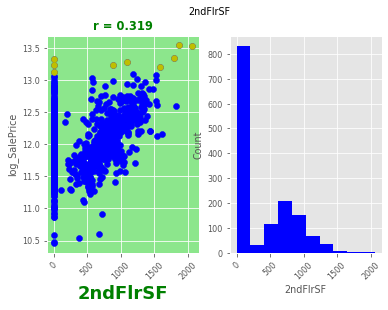

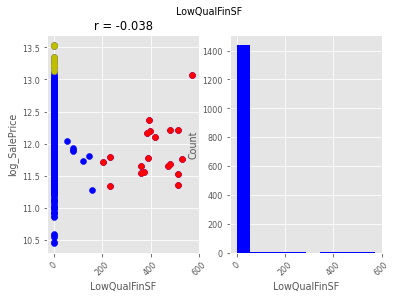

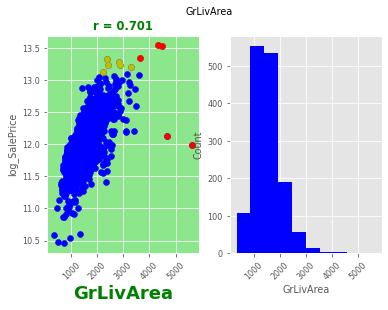

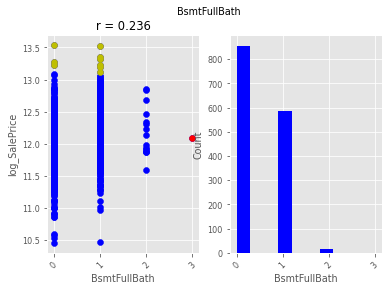

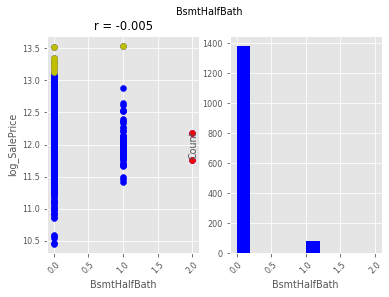

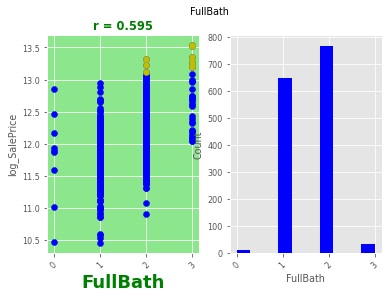

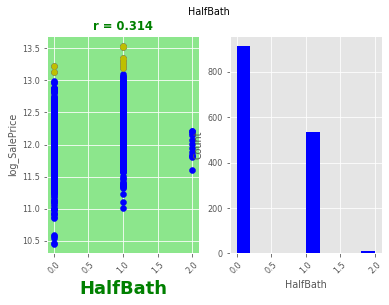

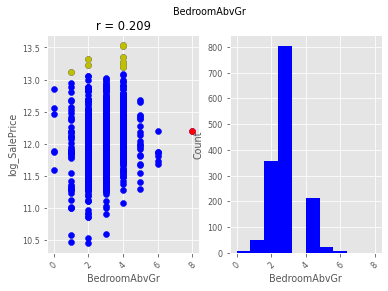

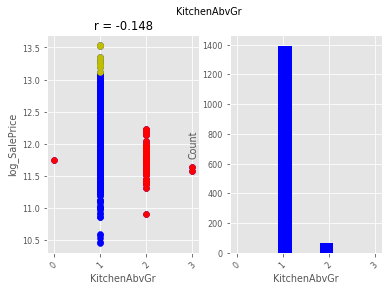

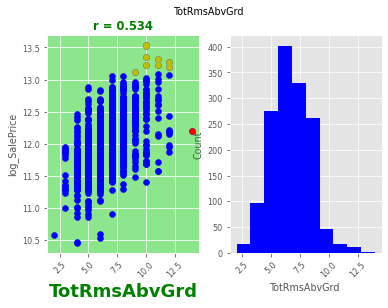

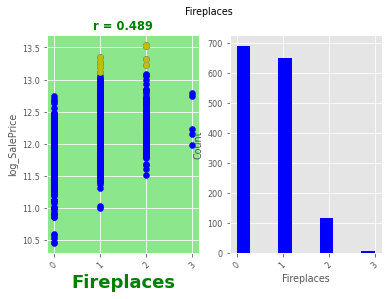

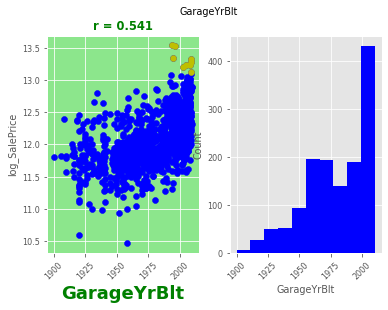

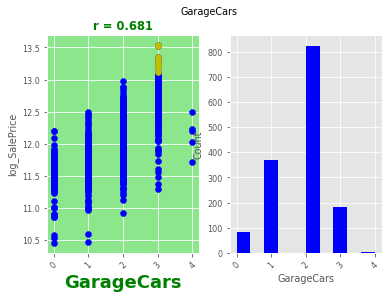

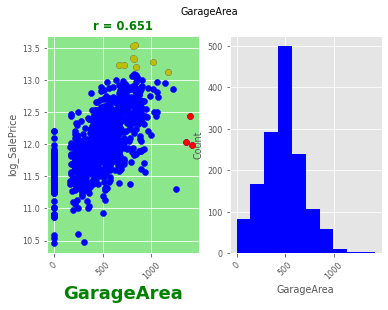

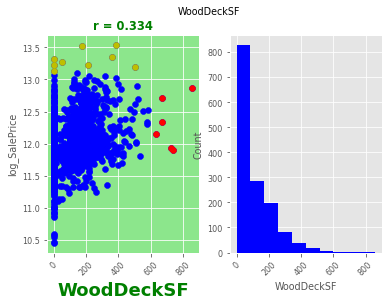

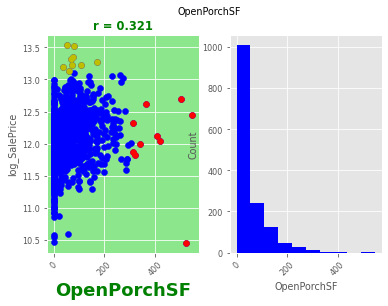

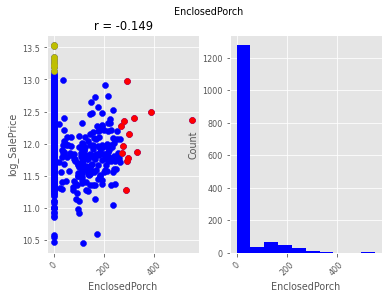

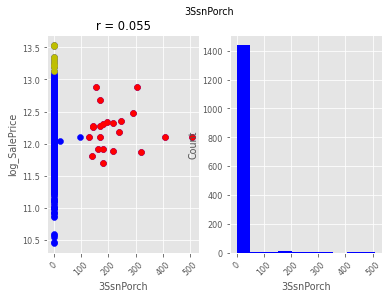

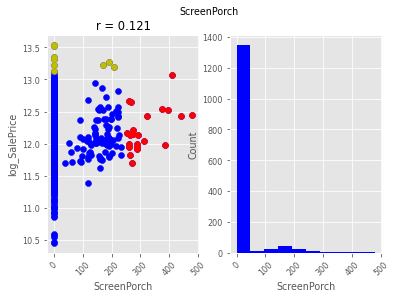

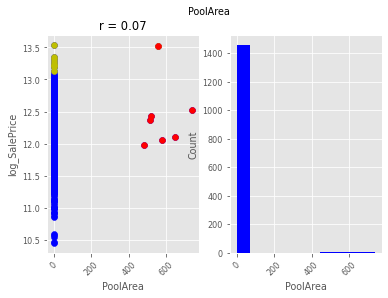

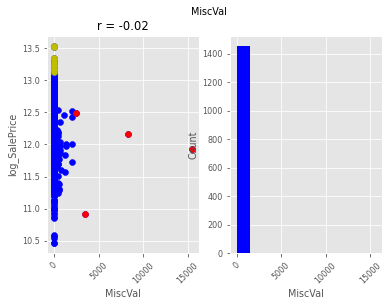

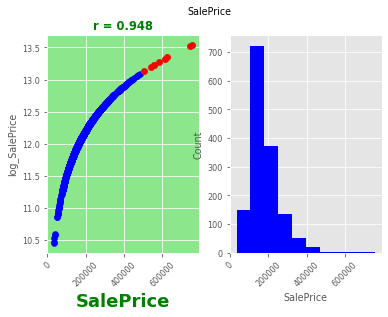

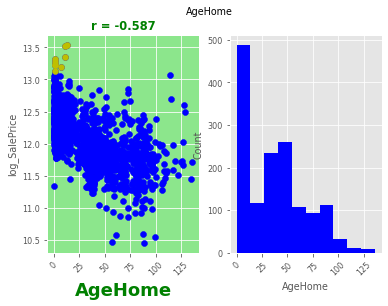

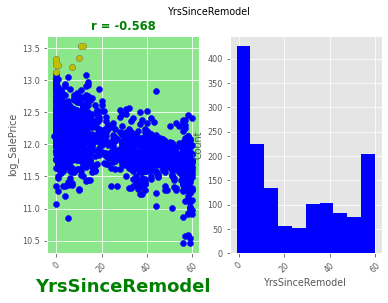

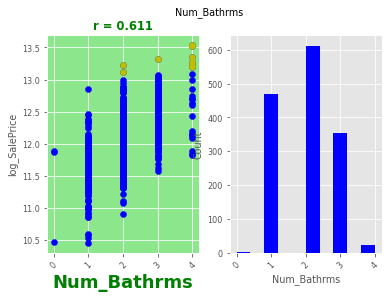

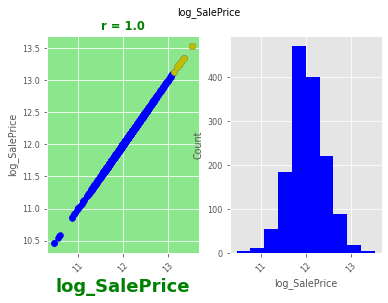

In [16]:
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

n_rcorr_values = []

for nvar in numlist:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Which indices have z-scores > 4
    zvals = stats.zscore(train0[nvar])
    zindx = np.where(abs(zvals) > 4)

    # Scatter
    axs[0].scatter(train0[nvar],train0['log_SalePrice'],color='b')
    axs[0].scatter(train0.loc[indx,nvar],
                   train0.loc[indx,'log_SalePrice'],color='y') # *** SalePrice z-scores > 4
    axs[0].scatter(train0.loc[zindx,nvar],
                   train0.loc[zindx,'log_SalePrice'],color='r') # z-scores > 4

    r = ma.corrcoef(ma.masked_invalid(train0[nvar]), 
                ma.masked_invalid(train0['log_SalePrice']))
    
    n_rcorr_values.append(r[0,1])
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        axs[0].set_xlabel(nvar, fontsize = 18, fontweight = 'bold',color='g')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        axs[0].set_xlabel(nvar)
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('log_SalePrice')

In [17]:
# num_train.describe()

In [18]:
# Combine the var names and correlations values:
n_rcorr_values_abs = np.abs(n_rcorr_values)
zipped = list(zip(numlist,
                 n_rcorr_values,
                 n_rcorr_values_abs))

num_results = pd.DataFrame(zipped, columns=['num var',
                                       'corr value',
                                       'corr magnitude'])

pd.options.display.float_format = '{:,.5f}'.format

print('Only presenting the variables that have correlation')
print('coefficients (absolute value) > corr_thrshld')

num_results_sorted = num_results.sort_values('corr magnitude', ascending = False)
num_results_sorted.loc[num_results_sorted['corr magnitude']>corr_thrshld]

Only presenting the variables that have correlation
coefficients (absolute value) > corr_thrshld


num var  corr value  corr magnitude
37    log_SalePrice     1.00000         1.00000
33        SalePrice     0.94837         0.94837
3       OverallQual     0.81718         0.81718
14        GrLivArea     0.70093         0.70093
24       GarageCars     0.68062         0.68062
25       GarageArea     0.65089         0.65089
10      TotalBsmtSF     0.61213         0.61213
36      Num_Bathrms     0.61080         0.61080
11         1stFlrSF     0.59698         0.59698
17         FullBath     0.59477         0.59477
34          AgeHome    -0.58729         0.58729
35  YrsSinceRemodel    -0.56814         0.56814
5      YearRemodAdd     0.56561         0.56561
23      GarageYrBlt     0.54107         0.54107
21     TotRmsAbvGrd     0.53442         0.53442
22       Fireplaces     0.48945         0.48945
6        MasVnrArea     0.43081         0.43081
7        BsmtFinSF1     0.37202         0.37202
1       LotFrontage     0.35588         0.35588
26       WoodDeckSF     0.33414         0.33414
27      OpenPorchSF     0.32105         0.32105
12         2ndFlrSF     0.31930         0.31930
18         HalfBath     0.31398         0.31398

Taking a closer look at GrLivArea 🤔 and SaleCondition

In [19]:
large_zscores = np.where(abs(stats.zscore(train0['GrLivArea'])) > 4.5)
print(large_zscores)

(array([ 523,  691, 1182, 1298]),)


Text(0.5, 0, 'GrLivArea')

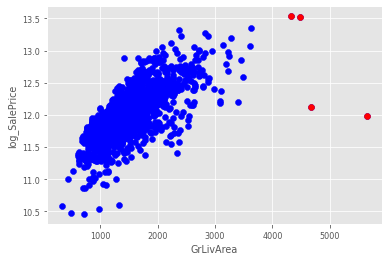

In [20]:
plt.scatter(train0['GrLivArea'],train0['log_SalePrice'],color='b')
plt.scatter(train0.loc[large_zscores,'GrLivArea'],
                   train0.loc[large_zscores,'log_SalePrice'],color='r') 

plt.ylabel('log_SalePrice')
plt.xlabel('GrLivArea')

In [21]:
train0.loc[[523,  691, 1182, 1298],:]

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524         60       RL    130.00000    40094   Pave   NaN      IR1   
691    692         60       RL    104.00000    21535   Pave   NaN      IR1   
1182  1183         60       RL    160.00000    15623   Pave   NaN      IR1   
1298  1299         60       RL    313.00000    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond YearBuilt  \
523        PosN     1Fam     2Story           10            5      2007   
691        Norm     1Fam     2Story           10            6      1994   
1182       Norm     1Fam     2Story           10            5      1996   
1298       Norm     1Fam     2Story           10            5      2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523    762.00000        Ex        TA      PConc       Ex       TA   
691  1,170.00000        Ex        TA      PConc       Ex       TA   
1182     0.00000        Gd        TA      PConc       Ex       TA   
1298   796.00000        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ        2260          Unf           0   
691            Gd          GLQ        1455          Unf           0   
1182           Av          GLQ        2096          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523         878         3138    GasA        Ex          Y      SBrkr   
691         989         2444    GasA        Ex          Y      SBrkr   
1182        300         2396    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
691       2444      1872             0       4316             0             1   
1182      2411      2065             0       4476             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
691          3         1             4             1          Ex   
1182         3         1             4             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn  2,007.00000   
691             10        Typ           2          Ex     Attchd  1,994.00000   
1182            10        Typ           2          TA     Attchd  1,996.00000   
1298            12        Typ           3          Gd     Attchd  2,008.00000   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3         884         TA         TA          Y   
691           Fin           3         832         TA         TA          Y   
1182          Fin           3         8

In [22]:
# Debating if these should be included? Quite a few. Keeping them. 
np.where(train0['SaleCondition']=='Family')

(array([ 137,  154,  217,  251,  299,  454,  628,  632,  655,  734,  804,
         822,  858,  886, 1102, 1127, 1145, 1242, 1387, 1404]),)

## B. The Categorical Variables

# III. PREPROCESSING - Preparation for Model Training

In [23]:
cattypes = ['O']
cat_train = train0.select_dtypes(include=cattypes)
catlist = list(cat_train)
print(len(catlist),' categorical variables')
catlist

47  categorical variables


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

<ipython-input-24-9407ee980393>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,8))


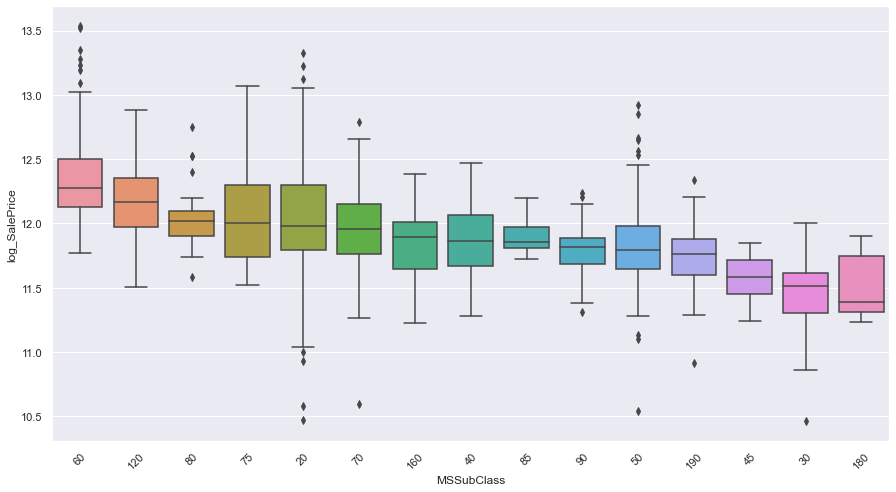

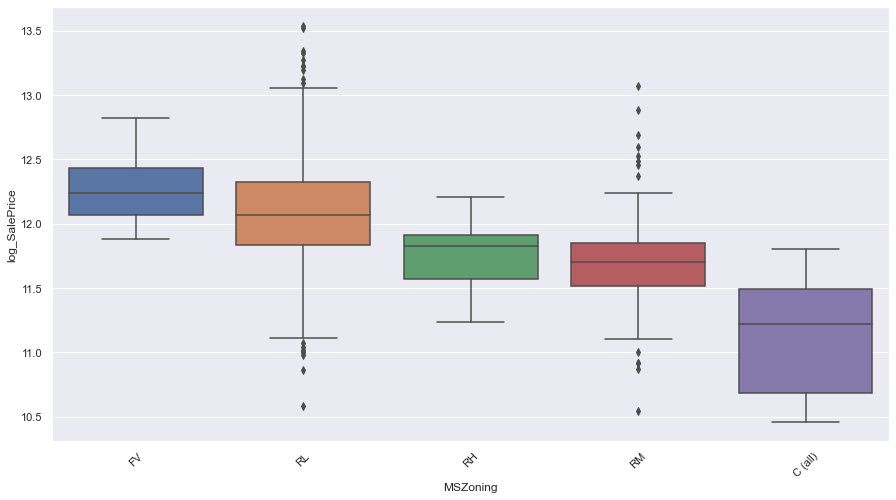

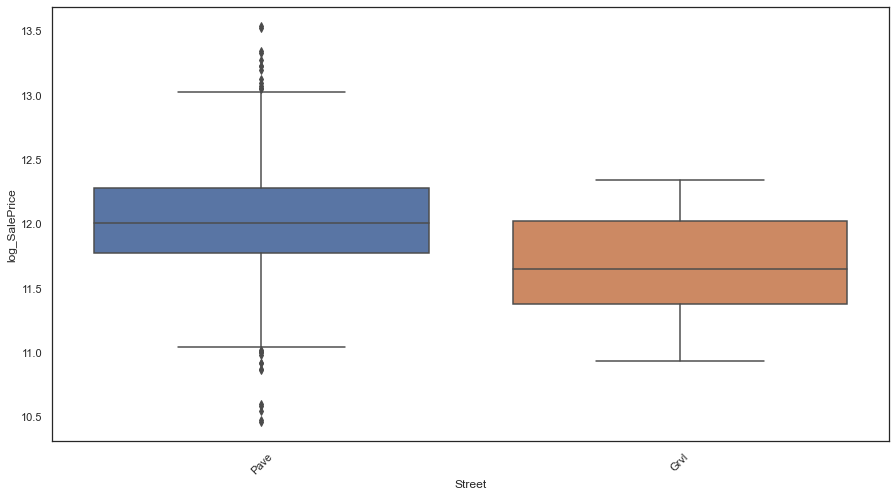

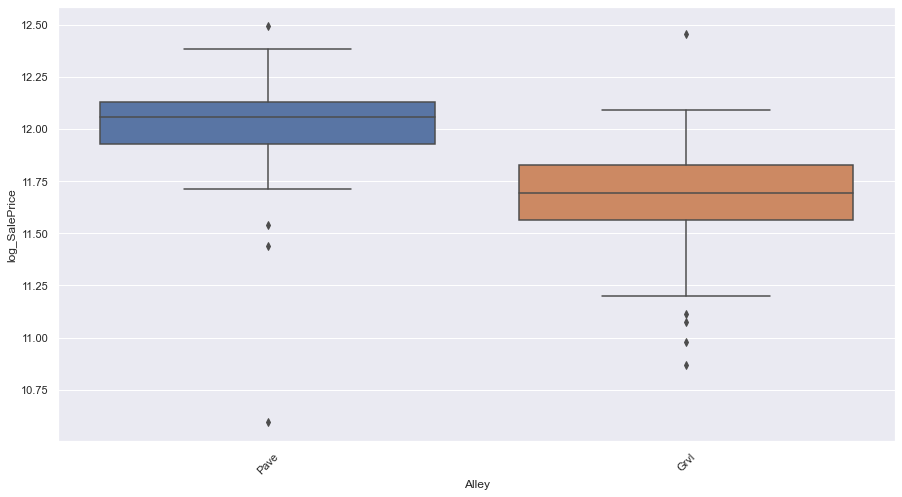

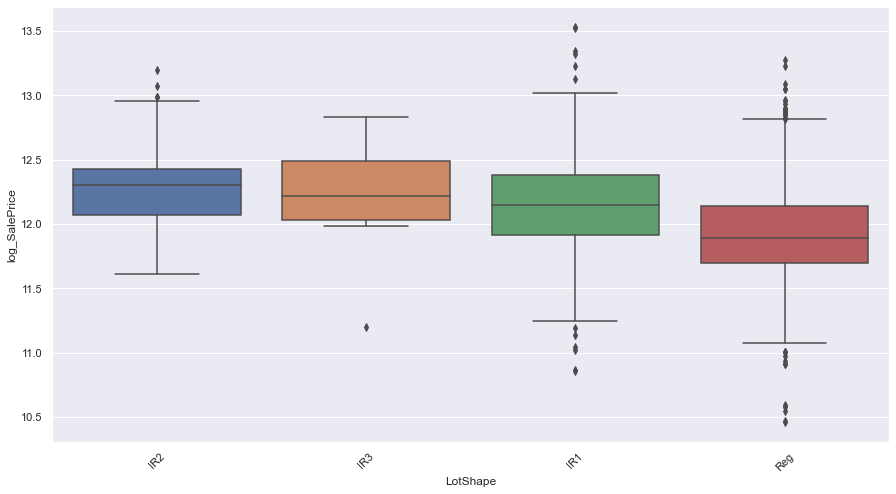

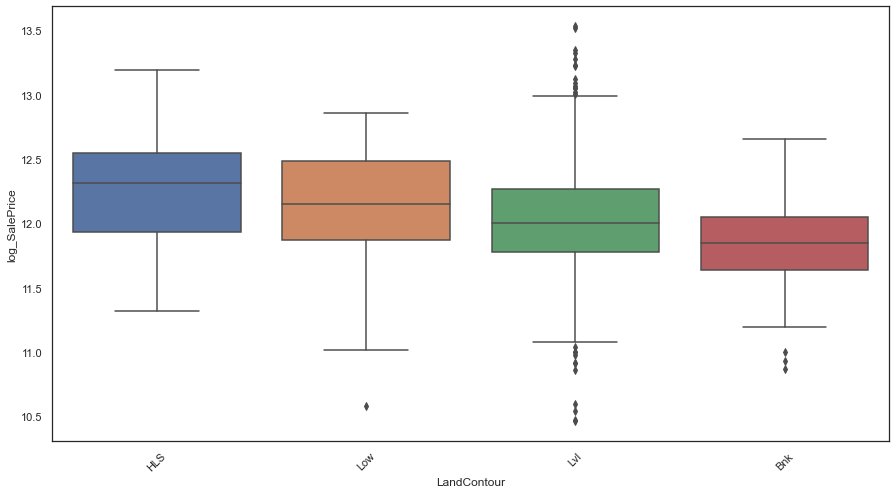

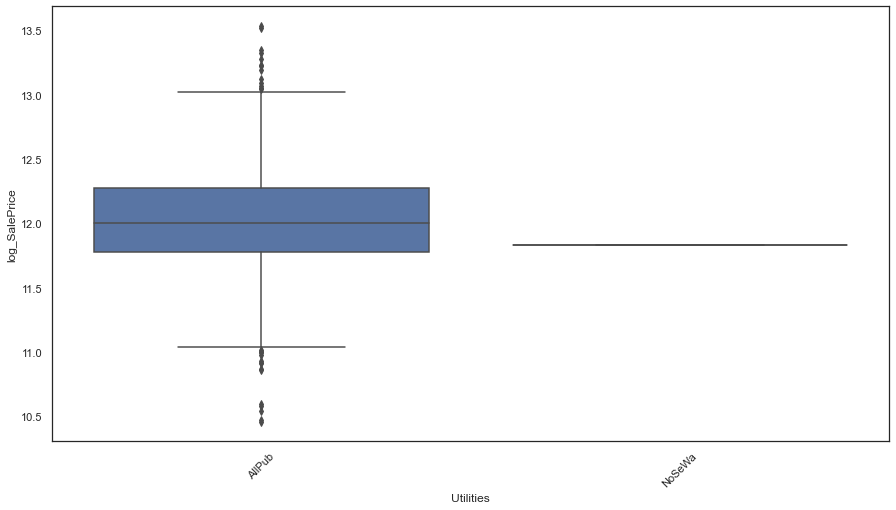

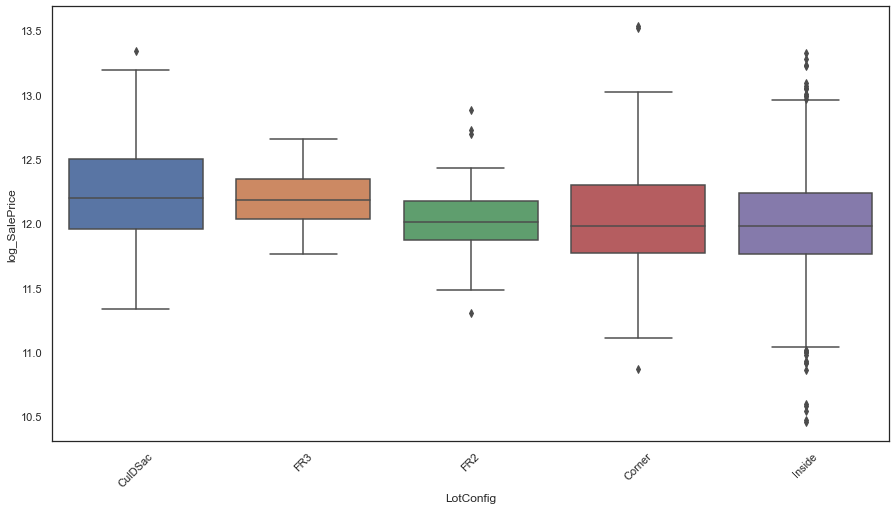

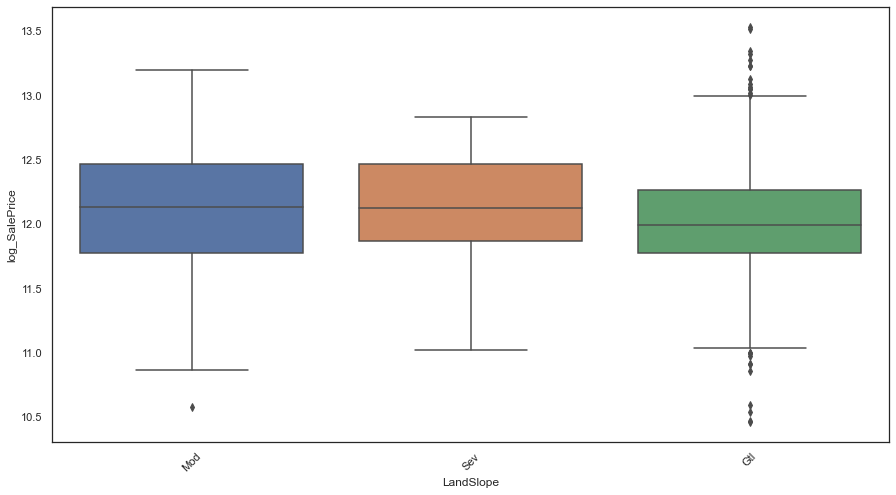

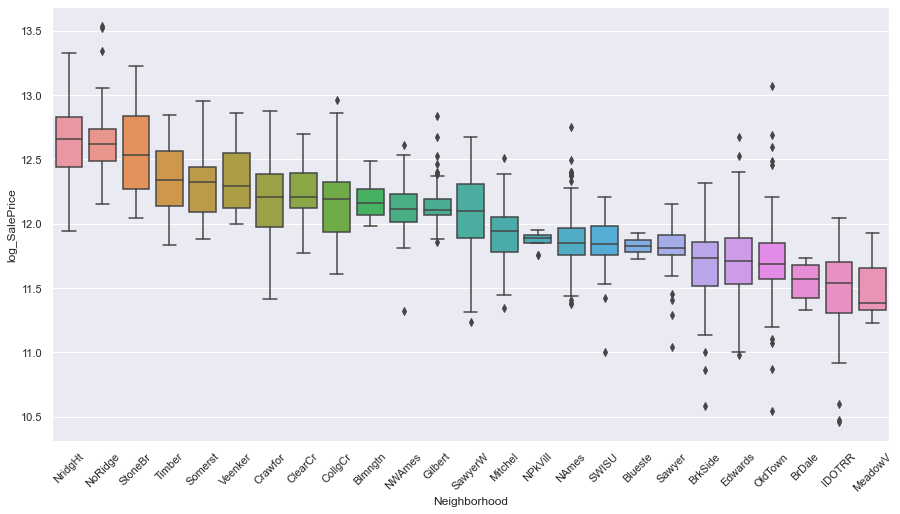

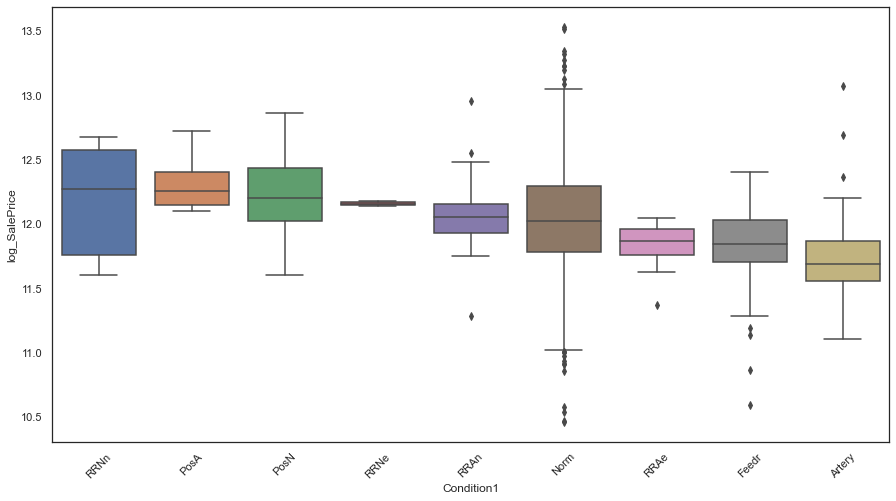

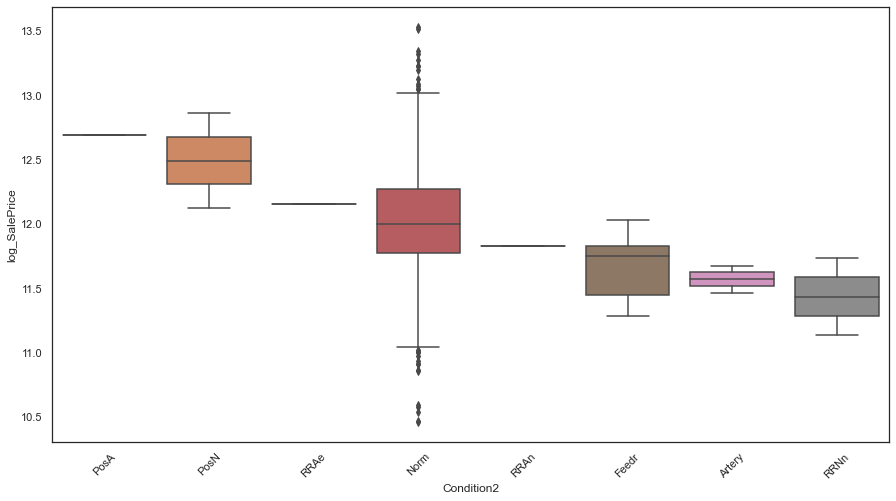

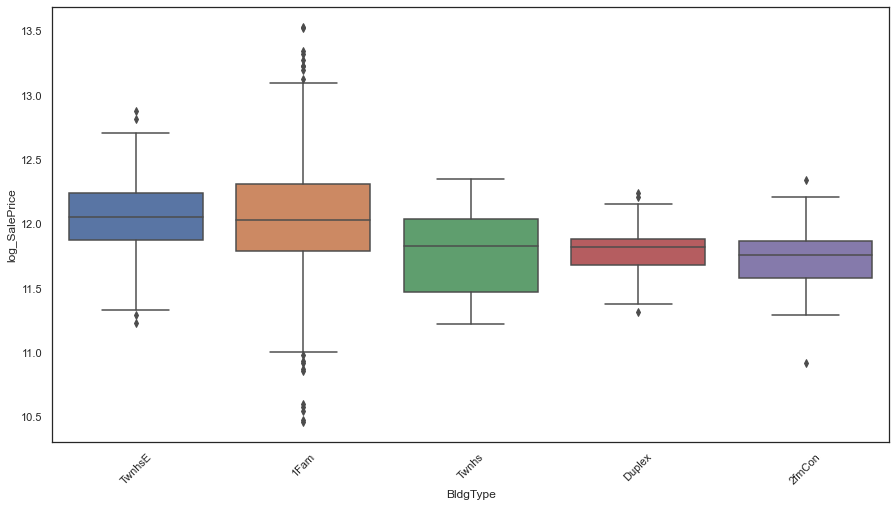

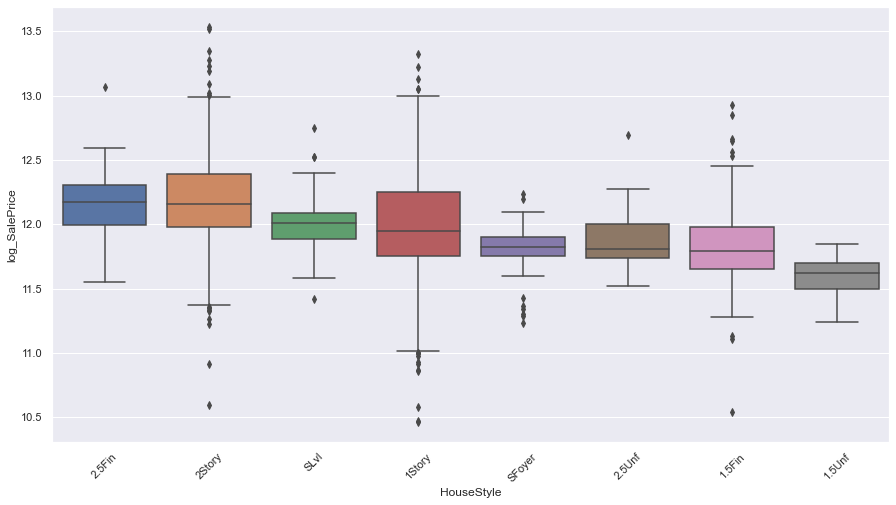

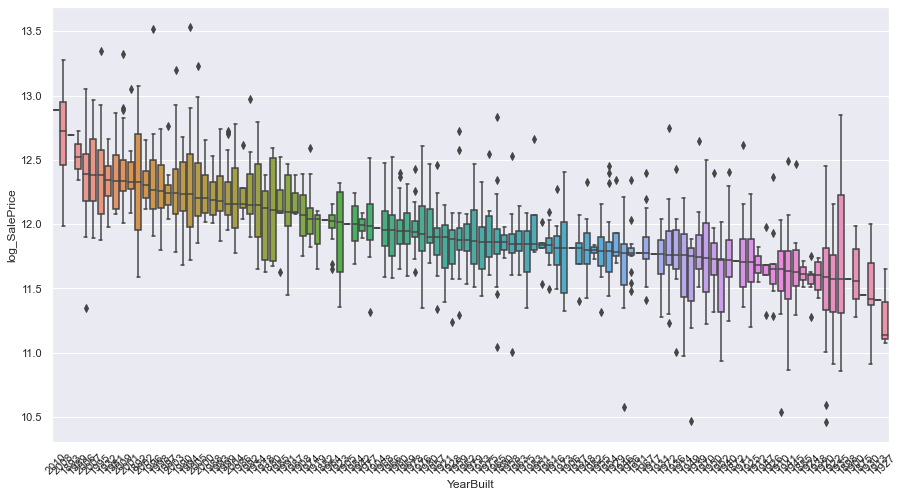

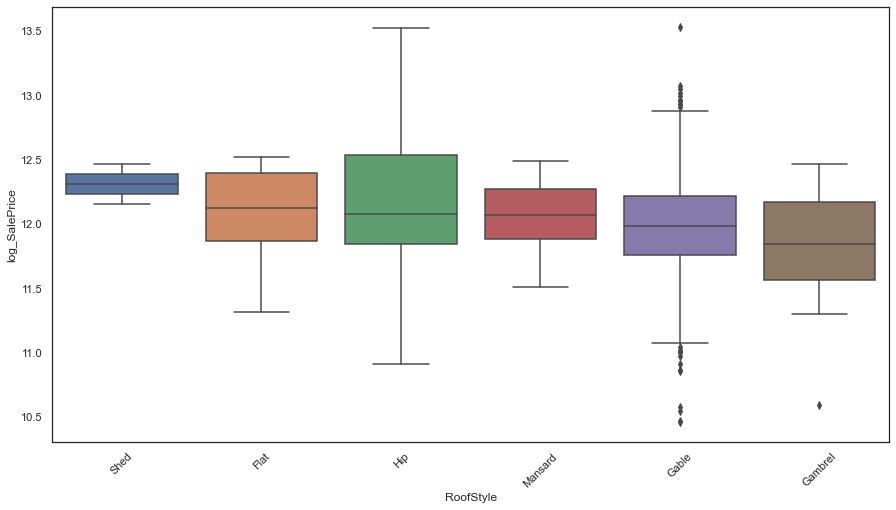

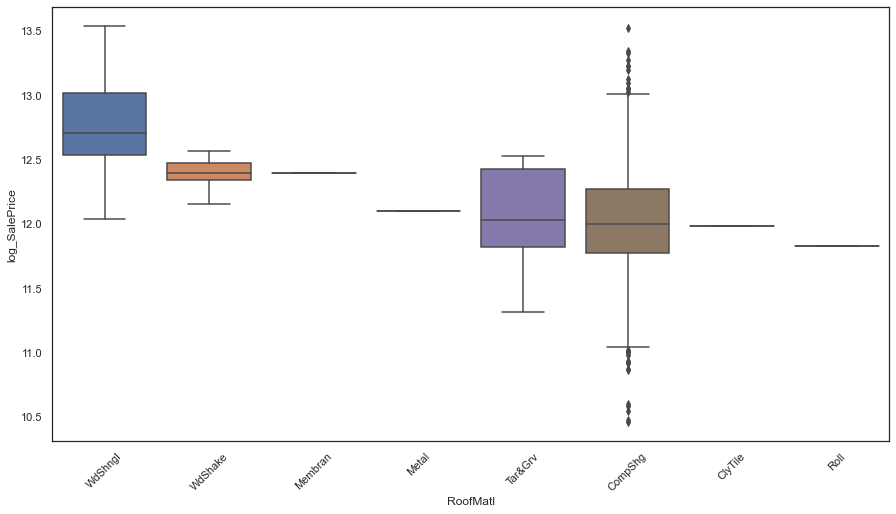

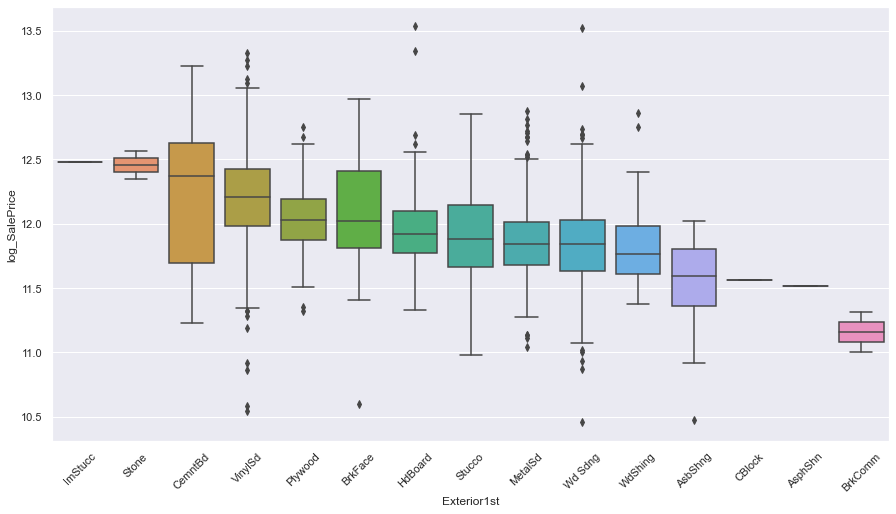

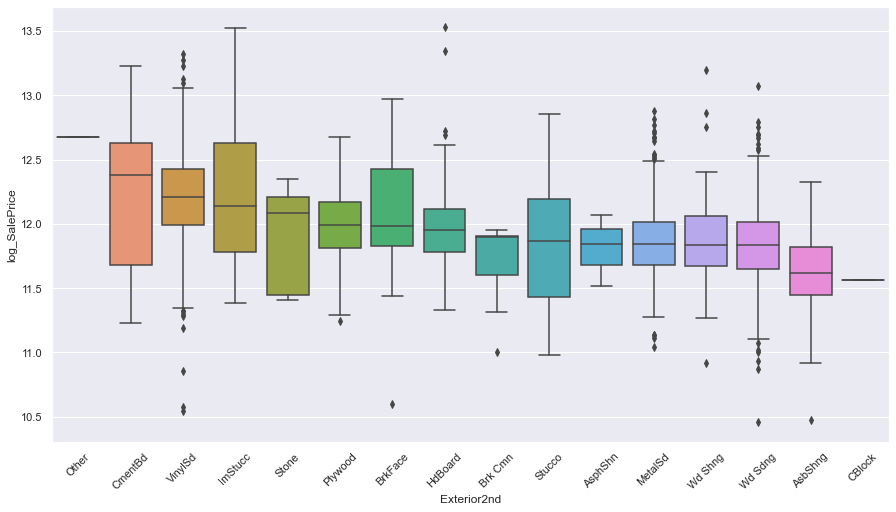

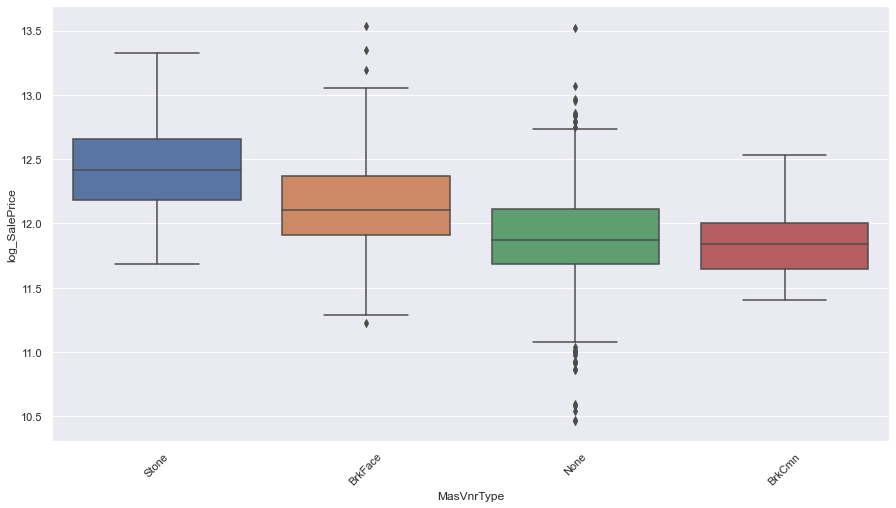

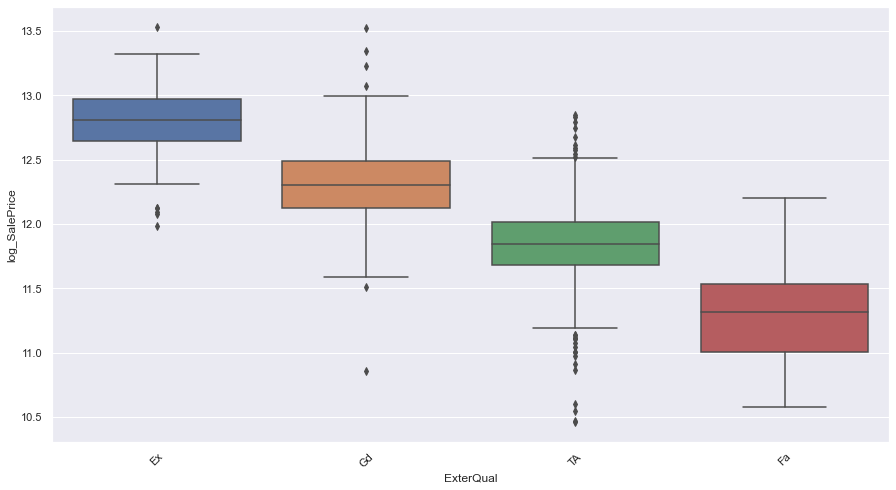

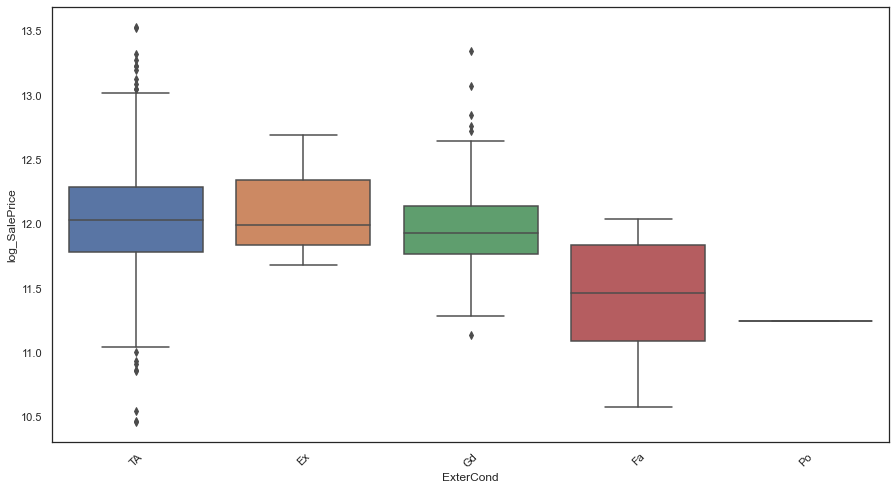

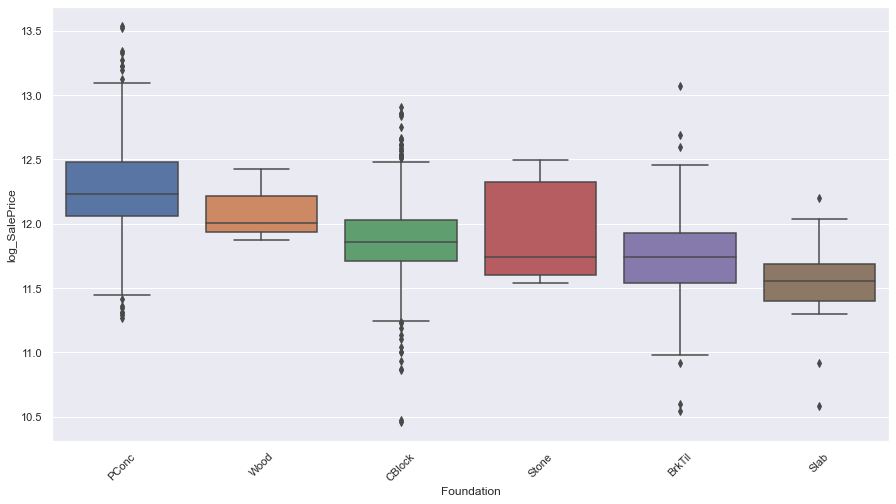

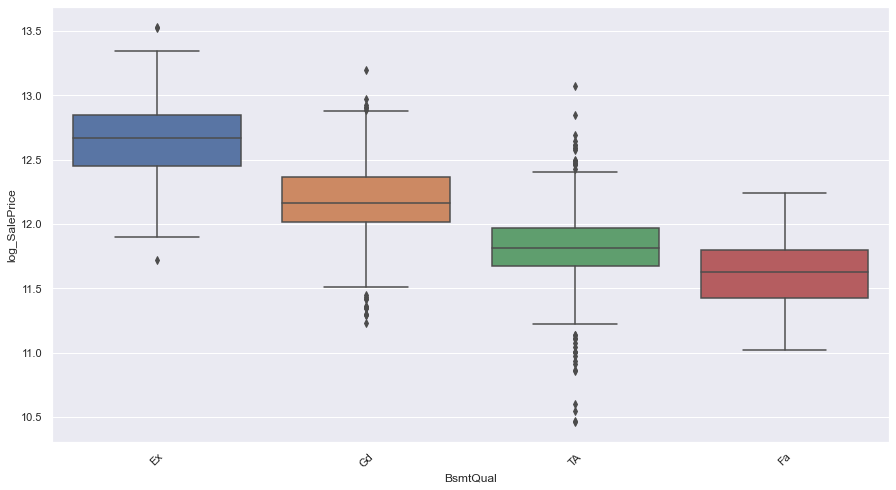

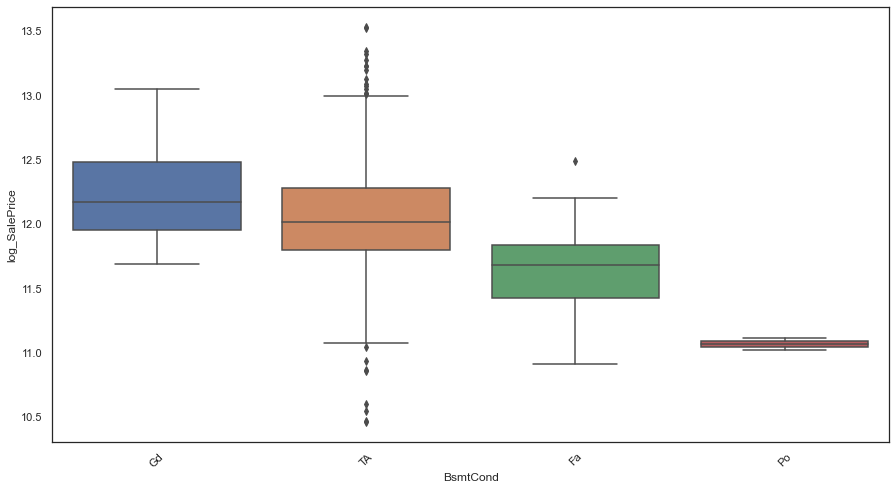

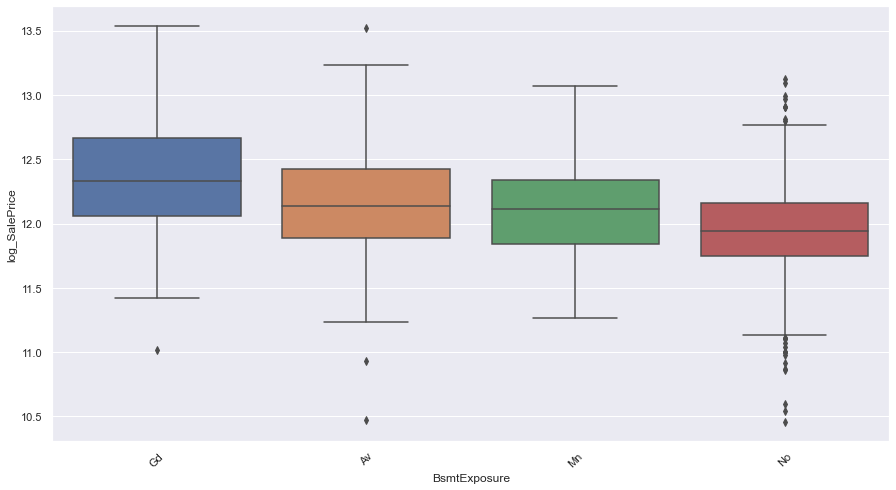

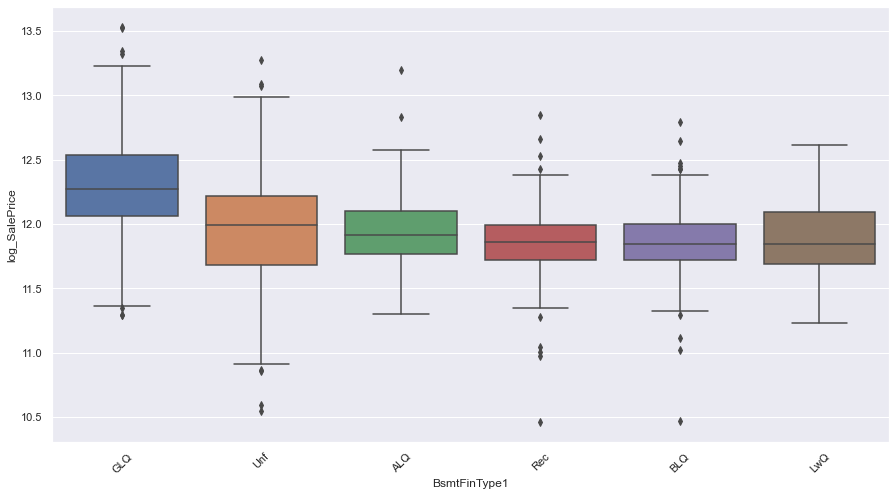

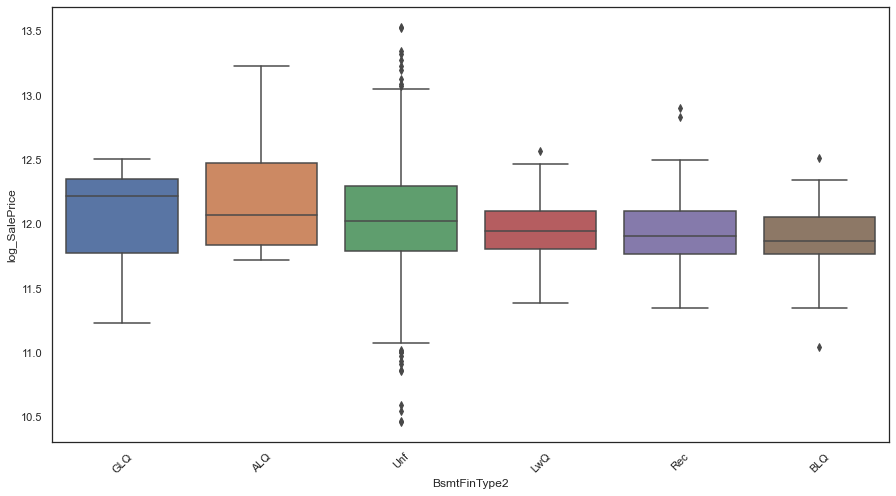

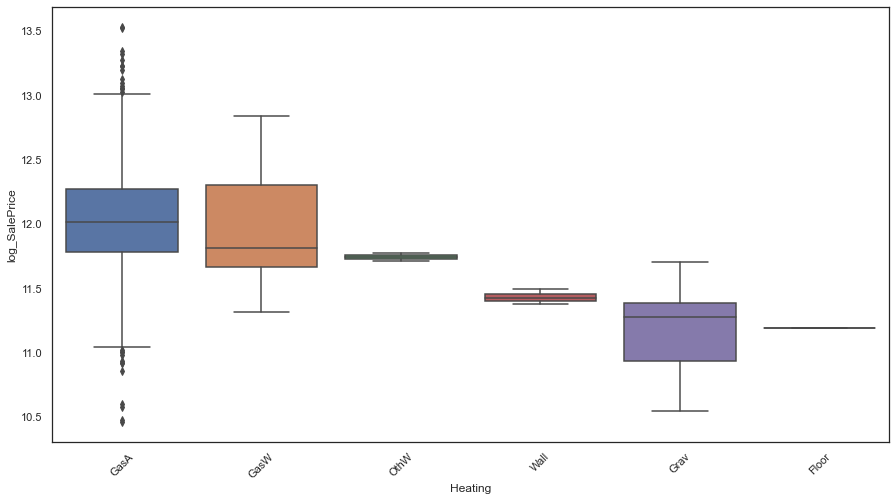

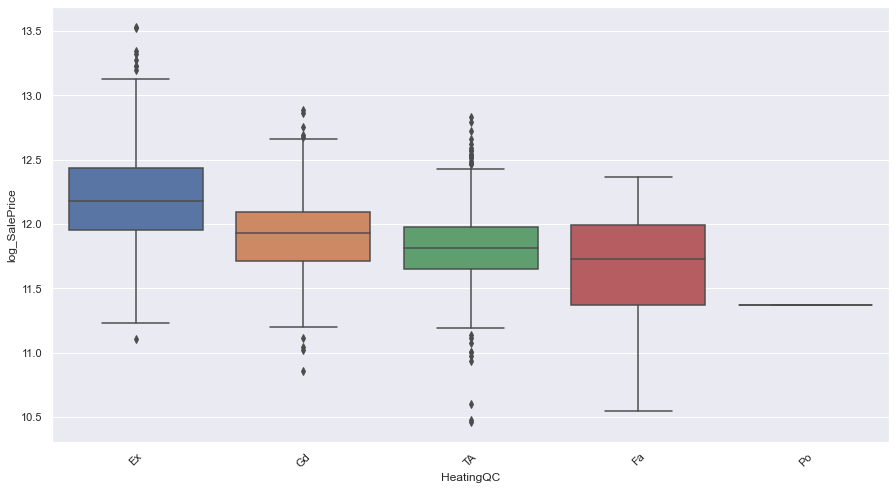

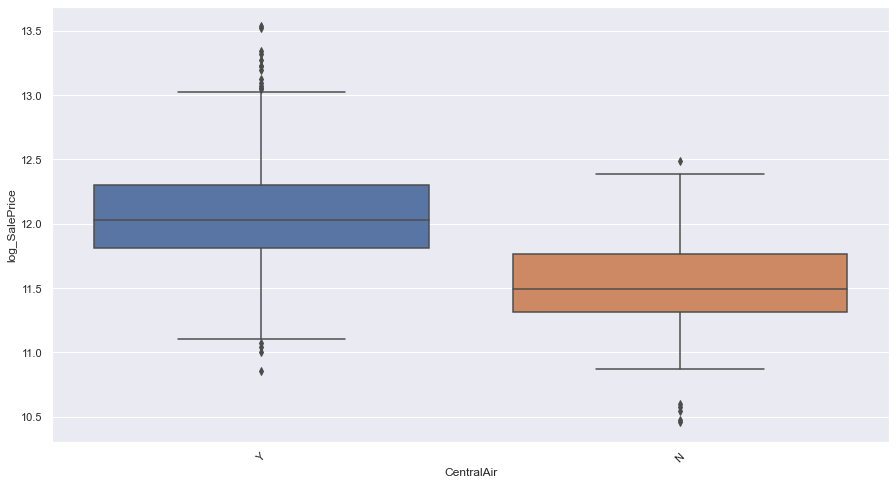

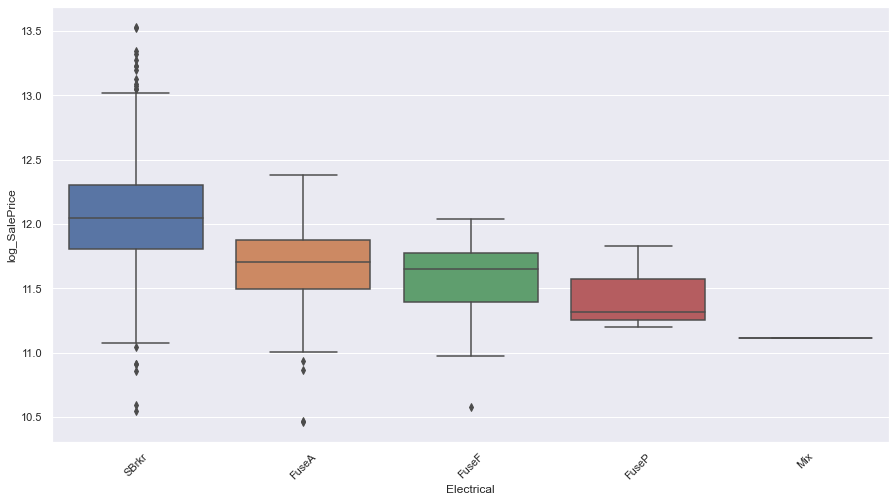

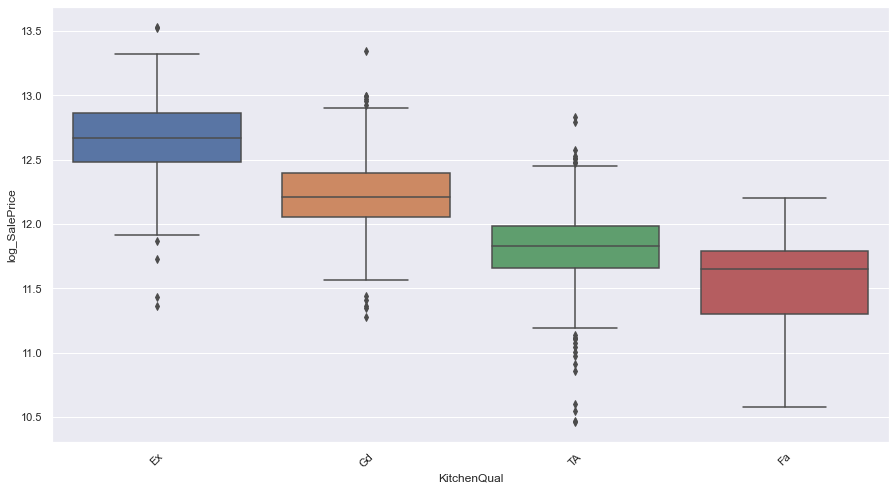

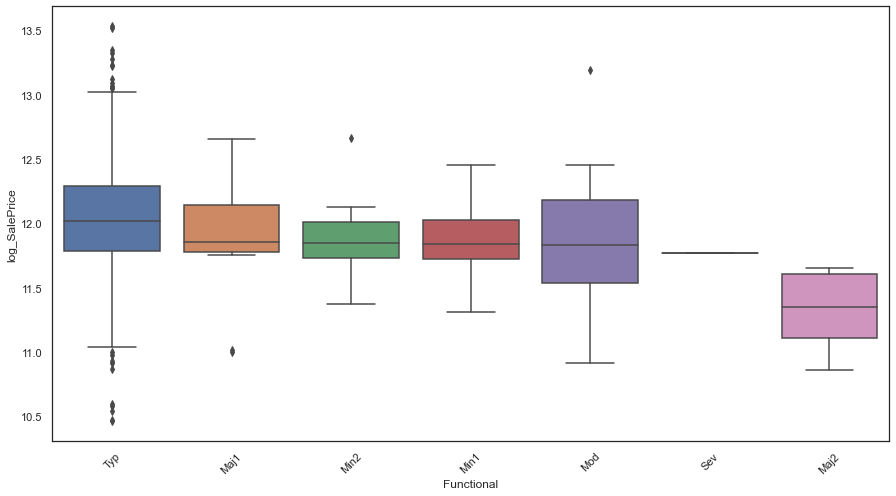

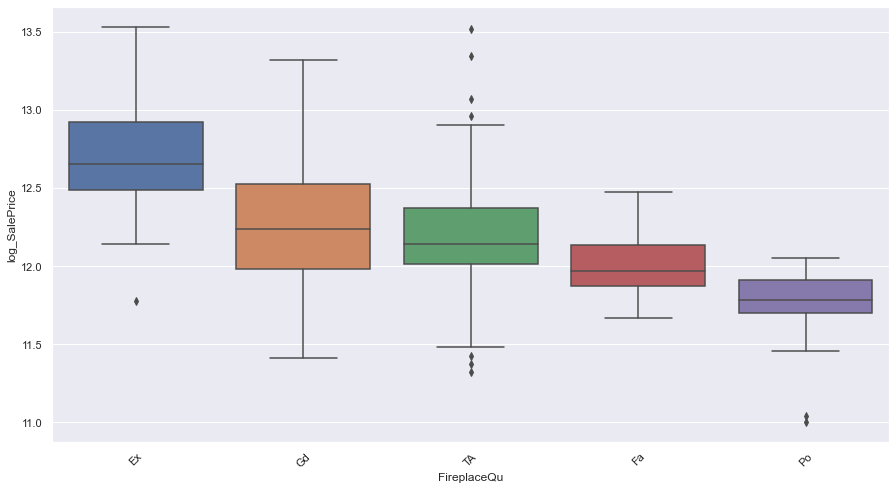

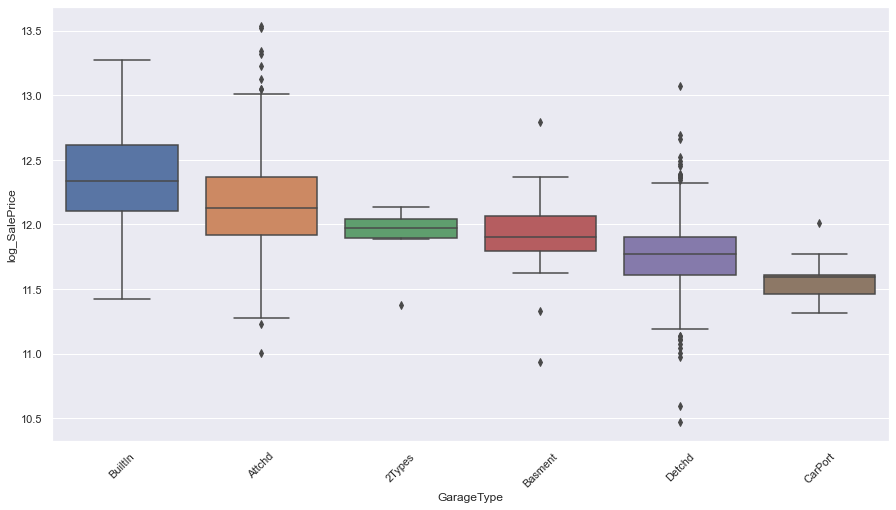

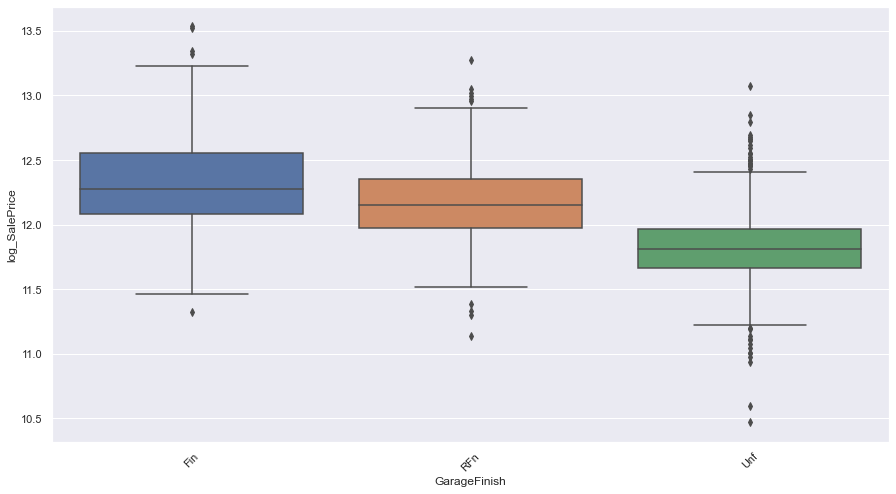

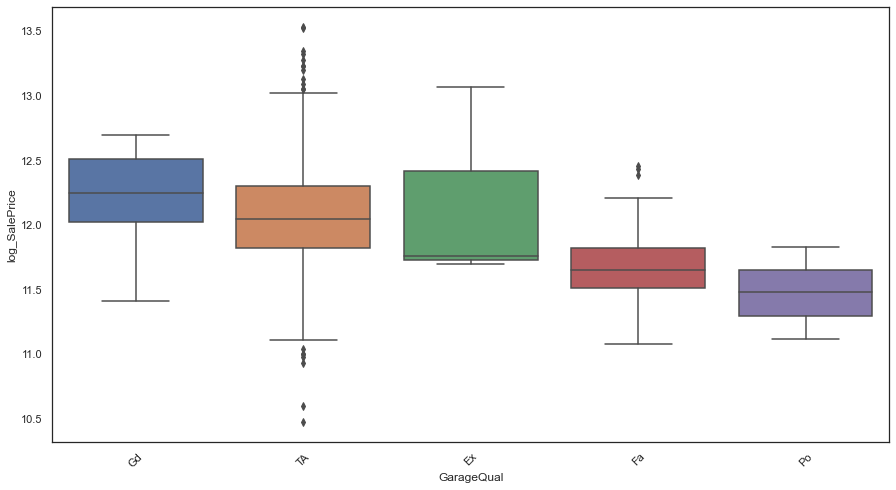

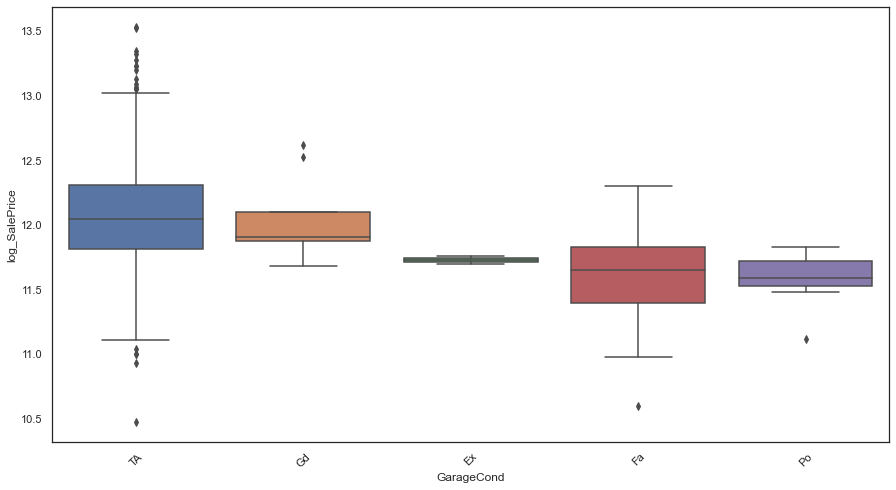

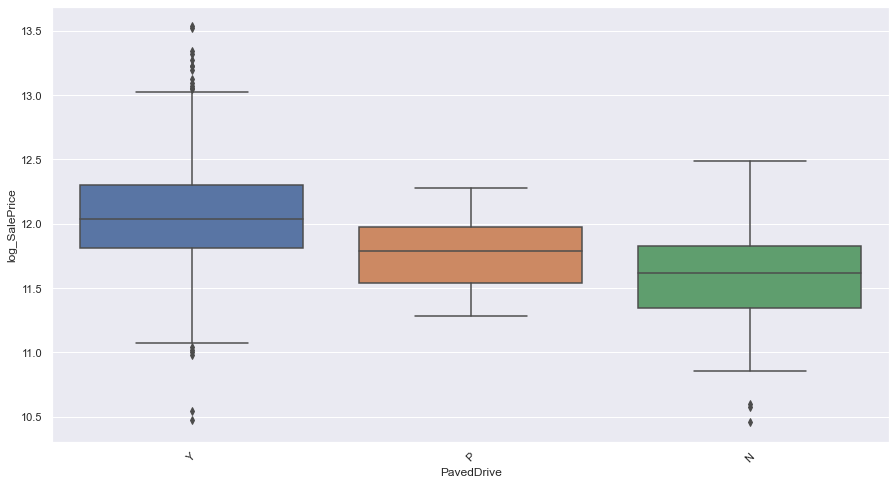

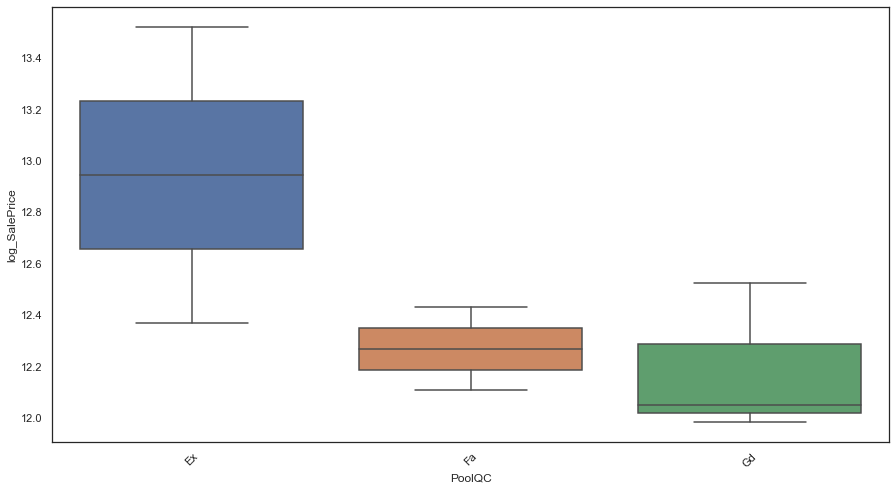

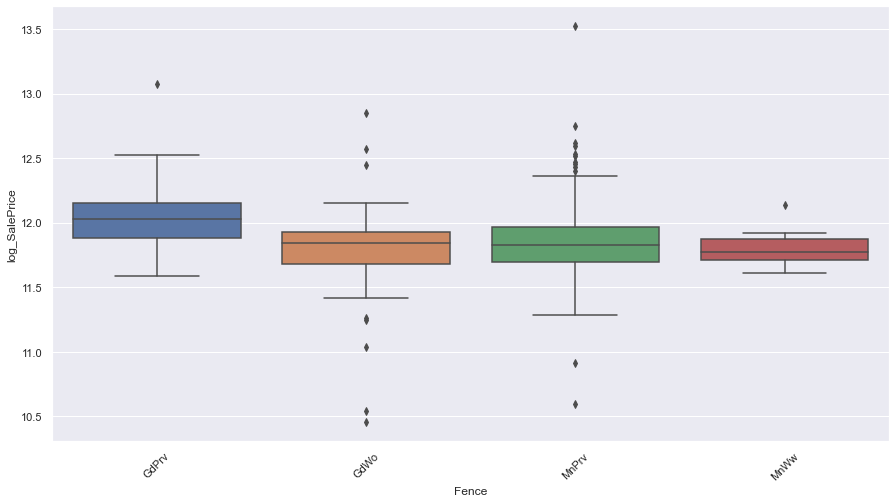

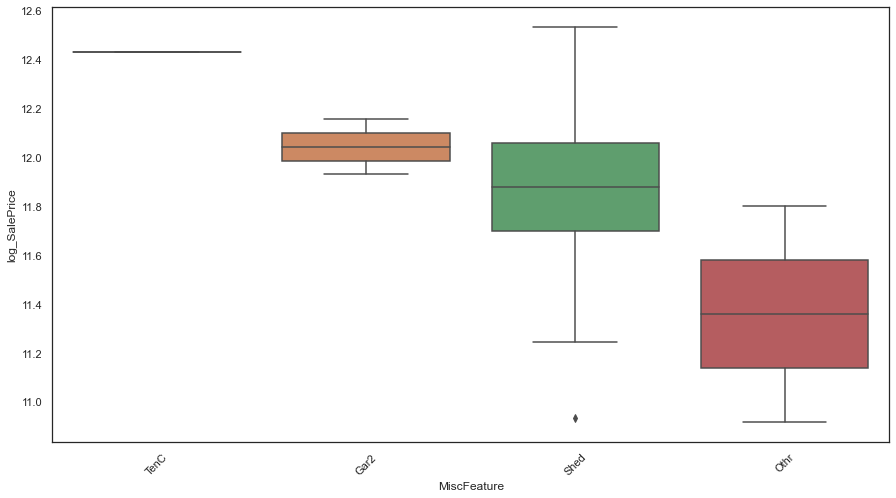

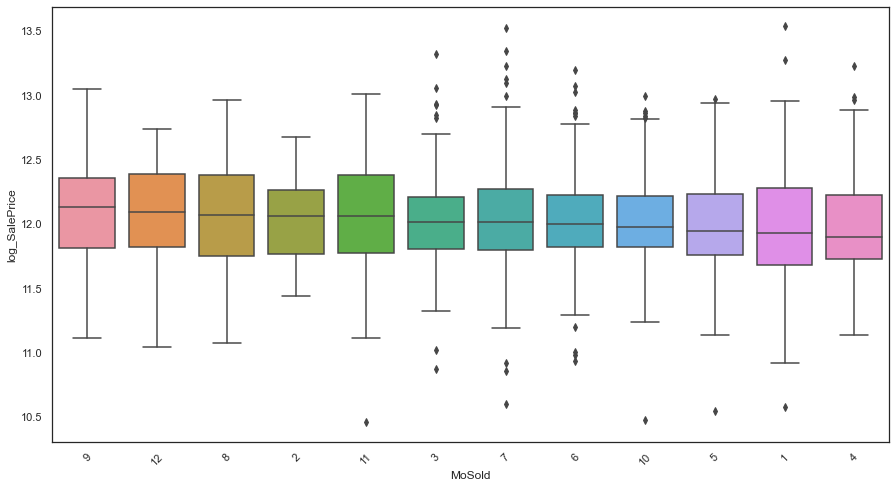

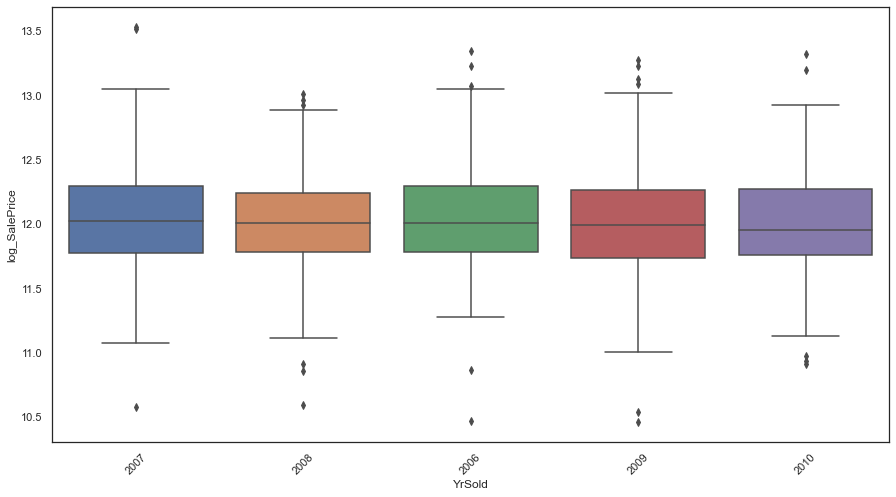

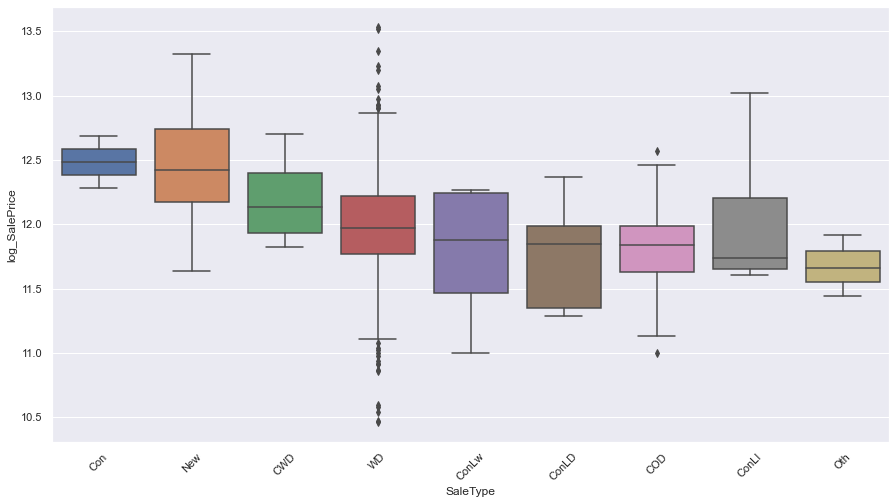

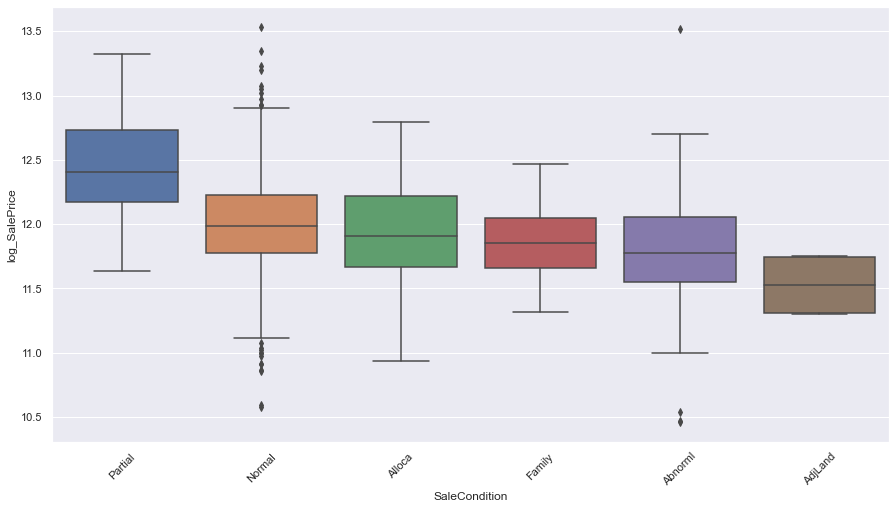

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
c_pvalues = []
c_eff_sizes = []

for cvar in catlist:   
    # Running a between groups ANOVA
    mstr = 'log_SalePrice ~ ' + cvar
    mod = ols(mstr,data=train0).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    eff_size_temp = (aov_table['sum_sq'][0])/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    
    c_pvalues.append(aov_table['PR(>F)'][0])
    c_eff_sizes.append(eff_size_temp)
    
    # ---------------------------------
    # The Figure
    # ---------------------------------
    sns.set(rc={'figure.facecolor':'white'})

    plt.figure(figsize = (15,8))   
    
    # Ordering by median
    temp = train0.groupby([cvar])['log_SalePrice'].median().sort_values(ascending=False).reset_index()   
    
    # Boxplot
    if aov_table['PR(>F)'][0] < 0.01 and eff_size_temp > 0.059:
        with sns.axes_style("darkgrid"):
            sns.boxplot(x=train0[cvar], 
                y=train0['log_SalePrice'],
                order = list(temp[cvar]))      
    else:
        with sns.axes_style("white"):
            sns.boxplot(x=train0[cvar], 
                y=train0['log_SalePrice'],
                order = list(temp[cvar]))
    
    plt.xticks(rotation=45)

In [25]:
# Combine the p-values and effect sizes:
zipped = list(zip(catlist,
                 c_pvalues, 
                 c_eff_sizes))

cat_results = pd.DataFrame(zipped, columns=['cat var',
                                       'anova_pvalues',
                                       'effect_sizes'])

print('Only presenting the variables that have ')
print('Anova p-values < 0.01 and effect sizes > 0.059')

pd.options.display.float_format = '{:,.5f}'.format

cat_results_sorted = cat_results.sort_values('anova_pvalues', ascending = True)
cat_results_sorted.head(50)
cat_results_sorted.loc[(cat_results_sorted['anova_pvalues']<0.01) &
                      cat_results_sorted['effect_sizes'] > 0.059]

Only presenting the variables that have 
Anova p-values < 0.01 and effect sizes > 0.059


cat var  anova_pvalues  effect_sizes
9    Neighborhood        0.00000       0.57081
20      ExterQual        0.00000       0.46112
32    KitchenQual        0.00000       0.44764
23       BsmtQual        0.00000       0.43538
14      YearBuilt        0.00000       0.49846
36   GarageFinish        0.00000       0.32345
0      MSSubClass        0.00000       0.33013
22     Foundation        0.00000       0.30365
35     GarageType        0.00000       0.26922
29      HeatingQC        0.00000       0.23352
19     MasVnrType        0.00000       0.19251
26   BsmtFinType1        0.00000       0.19824
1        MSZoning        0.00000       0.17584
17    Exterior1st        0.00000       0.18153
18    Exterior2nd        0.00000       0.17146
30     CentralAir        0.00000       0.12362
46  SaleCondition        0.00000       0.12902
45       SaleType        0.00000       0.12012
25   BsmtExposure        0.00000       0.11018
39     PavedDrive        0.00000       0.09323
31     Electrical        0.00000       0.09652
13     HouseStyle        0.00000       0.10210
4        LotShape        0.00000       0.08783
34    FireplaceQu        0.00000       0.11799
24       BsmtCond        0.00000       0.04939
21      ExterCond        0.00000       0.04551
38     GarageCond        0.00000       0.04773
15      RoofStyle        0.00000       0.04310
37     GarageQual        0.00000       0.04328
12       BldgType        0.00000       0.04014
10     Condition1        0.00000       0.04243
28        Heating        0.00000       0.03295
5     LandContour        0.00000       0.02563
7       LotConfig        0.00000       0.02334
3           Alley        0.00000       0.23281
33     Functional        0.00000       0.02379
41          Fence        0.00003       0.08211
16       RoofMatl        0.00045       0.01790

Looking more at counts...

Fewer houses sold in 2010...


<ipython-input-26-f1573fb08238>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


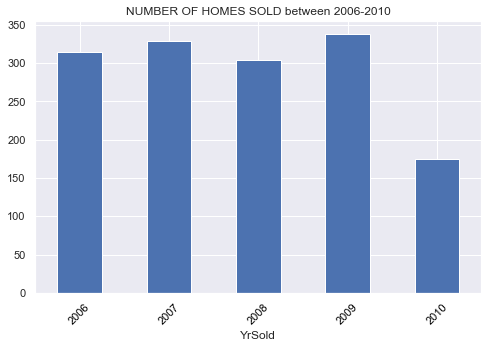

In [26]:
fig = plt.figure(figsize = (8,5))
train0.groupby('YrSold').size().plot.bar()
plt.title('NUMBER OF HOMES SOLD between 2006-2010');
ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=45)
print('Fewer houses sold in 2010...')

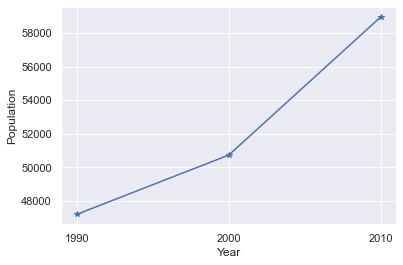

In [27]:
# US Census Population Numbers
year = [1990, 2000, 2010]
population = [47198, 50731, 58965]
zipped = list(zip(year, population))

df_pop = pd.DataFrame(zipped, columns=['Year', 'Population'])
df_pop.head()
plt.plot(df_pop['Year'], df_pop['Population'], marker ="*")
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks([1990, 2000, 2010]);

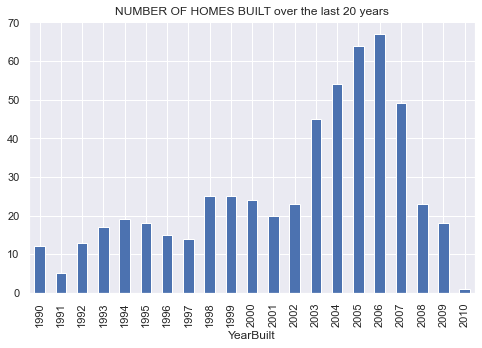

In [28]:
train_small = train0.loc[train0['YearBuilt'].isin(['1990','1991',
                                     '1992','1993',
                                     '1994','1995',
                                     '1996','1995',
                                     '1997','1998',
                                     '1999','2000',
                                     '2001','2002',
                                     '2003','2004',
                                     '2005','2006',
                                     '2007','2008',
                                     '2009','2010'])]
fig = plt.figure(figsize = (8,5))
train_small.groupby(['YearBuilt']).size().plot.bar()
plt.title('NUMBER OF HOMES BUILT over the last 20 years');

In [29]:
# Where were the homes built?
train_new = train0.loc[train0['YearBuilt'].isin(['2002',
                                     '2003','2004',
                                     '2005','2006',
                                     '2007','2008',
                                     '2009','2010'])]
train_new.groupby(['Neighborhood']).size().sort_values()

Neighborhood
OldTown     1
Crawfor     3
Mitchel     6
SawyerW     9
StoneBr    12
Blmngtn    17
Edwards    17
Timber     20
Gilbert    33
Somerst    70
NridgHt    77
CollgCr    79
dtype: int64

In [30]:
x = train_new.groupby(['YearBuilt','Neighborhood']).size()
x_new = x.unstack(level=-1, fill_value = 0)

# reorder the columns
x_new = x_new[['OldTown','Crawfor','Mitchel',
      'SawyerW','StoneBr','Blmngtn','Edwards','Timber',
      'Gilbert','Somerst','NridgHt','CollgCr']]

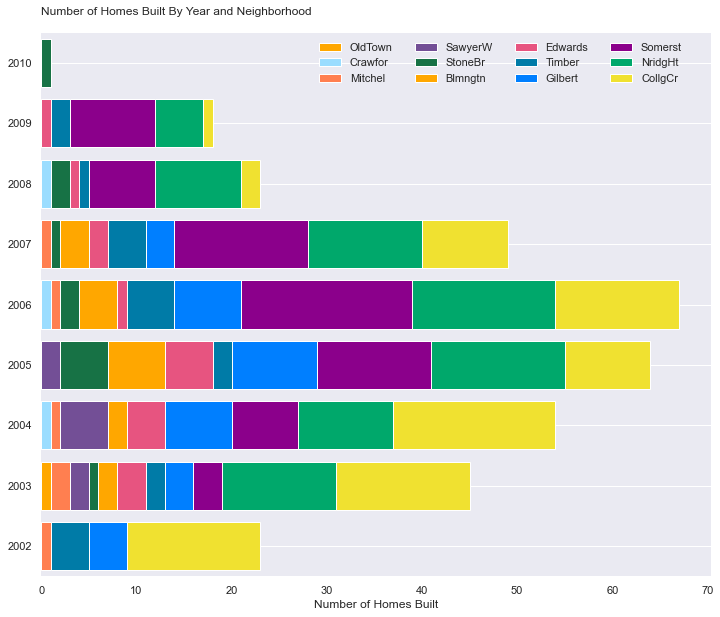

In [31]:
fields = ['OldTown','Crawfor','Mitchel',
      'SawyerW','StoneBr','Blmngtn','Edwards','Timber',
      'Gilbert','Somerst','NridgHt','CollgCr']
colors = ['#FFA700', # Chrome Yellow (light orange)
          '#9BDDFF', # Columbia Blue (light blue)
          '#FF7F50', # Coral
          '#734F96', # Dark Lavender
          '#177245', # Dark Spring Green
          '#FFA700', # Chrome Yellow (med orange)
          '#E75480', # Dark Pink
          '#007BA7', # Cerulean (dark teal)
          '#007FFF', # Azure (blue)
          '#8B008B', # Dark Magenta 
          '#00A86B', # Jade (soft green)
          '#F0E130', # Dandelion
          '#BD33A4', # Byzantine (magenta)
          '#003399'] # Dark Powder Blue (dark blue)
labels = ['OldTown','Crawfor','Mitchel',
      'SawyerW','StoneBr','Blmngtn','Edwards','Timber',
      'Gilbert','Somerst','NridgHt','CollgCr']
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(x_new) * [0]
for idx, name in enumerate(fields):
    plt.barh(x_new.index, x_new[name], left = left, color=colors[idx])
    left = left + x_new[name]
# title, legend, labels
plt.title('Number of Homes Built By Year and Neighborhood\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.40, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Number of Homes Built')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

During this boom in houses building (between ~2003-2007), more houses were built in CollgCr, NridgHt, and Somerst ☝️ followed by Timber and Gilbert. 

## 3A. Imputation - Numerical Variables

In [32]:
# How many Missing Values?
num_train.isna().sum()

Id                   0
LotFrontage        259
LotArea              0
OverallQual          0
OverallCond          0
YearRemodAdd         0
MasVnrArea           8
BsmtFinSF1           0
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
1stFlrSF             0
2ndFlrSF             0
LowQualFinSF         0
GrLivArea            0
BsmtFullBath         0
BsmtHalfBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenAbvGr         0
TotRmsAbvGrd         0
Fireplaces           0
GarageYrBlt         81
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MiscVal              0
SalePrice            0
AgeHome              0
YrsSinceRemodel      0
Num_Bathrms          0
log_SalePrice        0
dtype: int64

In [33]:
num_miss = list(num_train.columns[np.where(num_train.isna().sum() > 0)])
print('The Numerical Variables that are missing data:')
list(num_miss)

The Numerical Variables that are missing data:


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

## * LotFrontage

Lot Frontage (Continuous): Linear feet of street connected to property

In [34]:
train0['LotFrontage'].isnull().sum()

259

In [35]:
# Checking the LotConfig values
train0[train0['LotFrontage'].isnull()]['LotConfig'].unique()

array(['Corner', 'Inside', 'CulDSac', 'FR2'], dtype=object)

There are no obvious discrepancies observed with these missing data. Because I believe these homes do not have street connected to the property. Therefore I will replace the missing data with zero. 

In [36]:
# train0.groupby('Neighborhood')['LotFrontage'].median()

In [37]:
# ACTION: Let's change the missing LotFrontage rows
     # to be the median LotFrontage of its neighborhood

for i in list(set(train0['Neighborhood'])):
    df_neighbh = train0[train0['Neighborhood']== i] 
    
    windices = np.where((train0['LotFrontage'].isnull()) 
         & (train0['Neighborhood']==i))
    
    # print(i,df_neighbh['LotFrontage'].median(),windices)   
    
    train0.loc[(windices[0]),
               'LotFrontage'] = df_neighbh['LotFrontage'].median()

In [38]:
# Checking if the change was made
train0['LotFrontage'].isnull().sum()

0

## * MasVnrArea

(Google) A masonry veneer is an outer layer of brick or stone on a building. Masonry veneer is a construction material used on the exterior walls of homes and commercial buildings. It is comprised of thin pieces of brick or stone, and gives the appearance of solid masonry without the associated weight and cost.

MasVnrArea (Continuous): Masonry veneer area in square feet

MasVnrType (Nominal): Masonry veneer type

In [39]:
train0['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [40]:
# How many missing again?
train0['MasVnrArea'].isnull().sum()

8

In [41]:
# For these 'MasVnrArea' = nan, what'MasVnrType's do we have?
train0[train0['MasVnrArea'].isnull()]['MasVnrType'].unique()

array([nan], dtype=object)

In [42]:
# ACTION: Let's change the MasVnrType to 'None', for the MasVnrArea = NaN rows 
train0.loc[(train0['MasVnrArea'].isnull()),'MasVnrType']='None'

# ACTION: Let's change the MasVnrArea to 0.0, for the MasVnrArea = NaN rows 
train0.loc[(train0['MasVnrArea'].isnull()),'MasVnrArea']= 0.0

In [43]:
train0['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [44]:
print('MasVnrArea = nan are gone')
train0['MasVnrArea'].isnull().sum()

MasVnrArea = nan are gone


0

#### Another Discrepancy
- Here you see that some of the 'MasVnrType' == 'None' rows, have 'MasVnrArea' that are not equal to 0.0

In [45]:
print('Another issue... This does NOT make sense:')
train0[(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)]['MasVnrArea']

Another issue... This does NOT make sense:


624    288.00000
773      1.00000
1230     1.00000
1300   344.00000
1334   312.00000
Name: MasVnrArea, dtype: float64

In [46]:
np.where([(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)])

(array([0, 0, 0, 0, 0]), array([ 624,  773, 1230, 1300, 1334]))

In [47]:
# Remove these rows????? 
#train0 = train0.drop(labels=[624,773,1230,1300,1334], axis=0)

### Zeros

In [48]:
# Count number of zeros in all columns of Dataframe
for column_name in num_train.columns:
    column = num_train[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if count != 0: 
        print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  MasVnrArea  is :  861
Count of zeros in column  BsmtFinSF1  is :  467
Count of zeros in column  BsmtFinSF2  is :  1293
Count of zeros in column  BsmtUnfSF  is :  118
Count of zeros in column  TotalBsmtSF  is :  37
Count of zeros in column  2ndFlrSF  is :  829
Count of zeros in column  LowQualFinSF  is :  1434
Count of zeros in column  BsmtFullBath  is :  856
Count of zeros in column  BsmtHalfBath  is :  1378
Count of zeros in column  FullBath  is :  9
Count of zeros in column  HalfBath  is :  913
Count of zeros in column  BedroomAbvGr  is :  6
Count of zeros in column  KitchenAbvGr  is :  1
Count of zeros in column  Fireplaces  is :  690
Count of zeros in column  GarageCars  is :  81
Count of zeros in column  GarageArea  is :  81
Count of zeros in column  WoodDeckSF  is :  761
Count of zeros in column  OpenPorchSF  is :  656
Count of zeros in column  EnclosedPorch  is :  1252
Count of zeros in column  3SsnPorch  is :  1436
Count of zeros in column  ScreenPorch

In [49]:
print('Zeros could be reasonable, come back here later')

Zeros could be reasonable, come back here later


## 3B. Imputation - Categorica Variables

In [50]:
# How many Missing Values?
cat_train.isna().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
MoSold              0
YrSold              0
SaleType  

In [51]:
cat_miss = list(cat_train.columns[np.where(cat_train.isna().sum() > 0)])
print('The Categorical Variables that are missing data:')
list(cat_miss)

The Categorical Variables that are missing data:


['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [52]:
# Checking the values available for each categorical variable
for cvar in cat_miss:
    print(cvar, train0[cvar].unique())

Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


### Alley

In [53]:
print(train0['Alley'].unique())

[nan 'Grvl' 'Pave']


In [54]:
train0.loc[(train0['Alley'].isna()),'Alley']= 'NoAlley'

In [55]:
print(train0['Alley'].unique())

['NoAlley' 'Grvl' 'Pave']


### MasVnrType

I examined this variable above, when looking at the numerical variable MasVnrArea. See above comments. 

### Basement Variables 

Looking closer at the rows with missing data, the data_description.txt file indicates that these houses have "No Basement". If any of these categorical variables (listed here) have NA. 
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2

  - NA	➡➡➡  No Basement

In [56]:
# Grabbing the indices when each bsmt variabes have missing values
# in the data_description.txt, na should mean "No Basement"
bsmt_1 = np.where(train0['BsmtQual'].isna())
bsmt_2 = np.where(train0['BsmtCond'].isna())
bsmt_3 = np.where(train0['BsmtExposure'].isna())
bsmt_4 = np.where(train0['BsmtFinType1'].isna())
bsmt_5 = np.where(train0['BsmtFinType2'].isna())

In [57]:
all_NoBsmt_rows = np.concatenate((bsmt_1, 
                                  bsmt_2, 
                                  bsmt_3, 
                                  bsmt_4,
                                  bsmt_5), axis=None)

In [58]:
No_Bsmt_rows = np.unique(all_NoBsmt_rows)
print('These particular rows should have no basements, lets verify.')
print(No_Bsmt_rows)

These particular rows should have no basements, lets verify.
[  17   39   90  102  156  182  259  332  342  362  371  392  520  532
  533  553  646  705  736  749  778  868  894  897  948  984 1000 1011
 1035 1045 1048 1049 1090 1179 1216 1218 1232 1321 1412]


In [59]:
# lets look at these basement categorical variables 
bsmt_cvars = ['BsmtQual',
             'BsmtCond',
             'BsmtExposure',
             'BsmtFinType1',
             'BsmtFinType2']

print('For these indices, these values exist:')
print('Expecting nan values:')
print('\n')

for bcvar in bsmt_cvars:
    
    print(bcvar,
          No_Bsmt_rows[np.where(train0.loc[No_Bsmt_rows,bcvar].notna())],
          train0.loc[No_Bsmt_rows,bcvar].unique())

For these indices, these values exist:
Expecting nan values:


BsmtQual [332 948] [nan 'Gd']
BsmtCond [332 948] [nan 'TA']
BsmtExposure [332] [nan 'No']
BsmtFinType1 [332 948] [nan 'GLQ' 'Unf']
BsmtFinType2 [948] [nan 'Unf']


BsmtFinSF1 indices with samples > 0 [332]
BsmtFinSF2 indices with samples > 0 [332]
BsmtUnfSF indices with samples > 0 [332 948]
TotalBsmtSF indices with samples > 0 [332 948]
BsmtFullBath indices with samples > 0 [332]
BsmtHalfBath indices with samples > 0 []


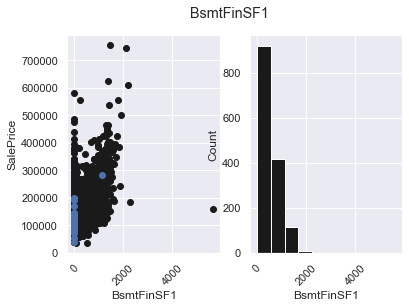

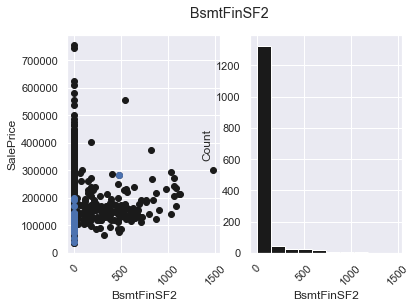

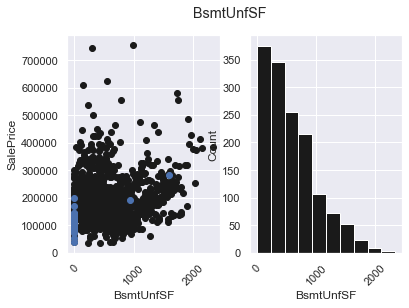

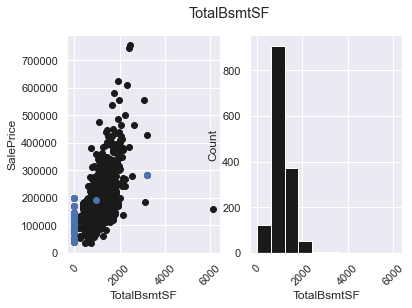

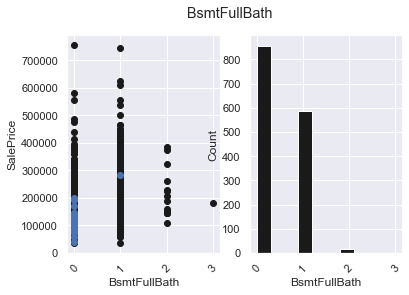

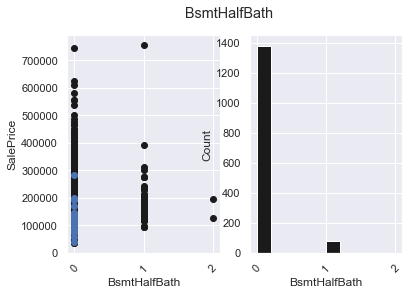

In [60]:
# lets look at these basement numerical variables 
bsmt_nvars = ['BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']     

for nvar in bsmt_nvars:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='k')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='k')
    
    # -------------------------------------------------------------------------------
    # Plotting the "no basement" rows to examine if these variables exhibit ZEROs
    # -------------------------------------------------------------------------------
    axs[0].scatter(train0.loc[No_Bsmt_rows,nvar],train0.loc[No_Bsmt_rows,'SalePrice'])

    print(nvar, 'indices with samples > 0', No_Bsmt_rows[np.where(train0.loc[No_Bsmt_rows, nvar]>0)])
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

In [61]:
print('This row does not make sense. BsmtFinType2 = NaN,')
print('BUT, there is a value for BsmtFinSF2 = 479.')
print('Lets consider dropping this row,')
print('Because BsmtFinType2 = ???? who knows\n')

print(train0.loc[332,['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinType2',
             'BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']])

This row does not make sense. BsmtFinType2 = NaN,
BUT, there is a value for BsmtFinSF2 = 479.
Lets consider dropping this row,
Because BsmtFinType2 = ???? who knows

BsmtQual          Gd
BsmtCond          TA
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinType2     NaN
BsmtFinSF1      1124
BsmtFinSF2       479
BsmtUnfSF       1603
TotalBsmtSF     3206
BsmtFullBath       1
BsmtHalfBath       0
Name: 332, dtype: object


In [62]:
print('Okay, this row is OK. BsmtExposure = NaN.')
print('But clearly there is a basement (unfinished).')
print('ACTION: Changing BsmtExposure = No\n')
print(train0.loc[948,['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinType1',
             'BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']])

Okay, this row is OK. BsmtExposure = NaN.
But clearly there is a basement (unfinished).
ACTION: Changing BsmtExposure = No

BsmtQual         Gd
BsmtCond         TA
BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinType1    Unf
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF       936
TotalBsmtSF     936
BsmtFullBath      0
BsmtHalfBath      0
Name: 948, dtype: object


In [63]:
print(train0.loc[948,'BsmtExposure'])
train0.loc[948,'BsmtExposure']='No'
print(train0.loc[948,'BsmtExposure'])

nan
No


Okay change these rows to 'NoBsmt'

In [64]:
bsmt_cvars

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [65]:
print(np.where(train0['BsmtQual'].isna()))
train0.loc[(train0['BsmtQual'].isna()),'BsmtQual']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtQual'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [66]:
print(np.where(train0['BsmtCond'].isna()))
train0.loc[(train0['BsmtCond'].isna()),'BsmtCond']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtCond'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [67]:
print(np.where(train0['BsmtExposure'].isna()))
train0.loc[(train0['BsmtExposure'].isna()),'BsmtExposure']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtExposure'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [68]:
print(np.where(train0['BsmtFinType1'].isna()))
train0.loc[(train0['BsmtFinType1'].isna()),'BsmtFinType1']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtFinType1'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [69]:
# Remove row 332 from this index list
# bsmt_5 = np.where(train0['BsmtFinType2'].isna())
x = bsmt_5[0].tolist()
x.remove(332)

print(x)
train0.loc[x,'BsmtFinType2']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtFinType2'].isna()))

[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
Missing values? : (array([332]),)


In [70]:
# Creating a new Bsmt variable
train0['hasBsmt'] = 'Basement'
train0.loc[No_Bsmt_rows,'hasBsmt'] = 'NoBsmt'

### Garage Variables

In [71]:
# Grabbing the indices when each garage variabes have missing values
garg_1 = np.where(train0['GarageType'].isna())
garg_2 = np.where(train0['GarageFinish'].isna())
garg_3 = np.where(train0['GarageQual'].isna())
garg_4 = np.where(train0['GarageCond'].isna())

In [72]:
all_NoGarg_rows = np.concatenate((garg_1, garg_2, garg_3, garg_4), axis=None)
# print(all_NoGarg_rows)

In [73]:
No_Garg_rows = np.unique(all_NoGarg_rows)
print('These particular rows should have no garages, lets verify.')
print(No_Garg_rows)
print(len(No_Garg_rows))

These particular rows should have no garages, lets verify.
[  39   48   78   88   89   99  108  125  127  140  148  155  163  165
  198  210  241  250  287  291  307  375  386  393  431  434  441  464
  495  520  528  533  535  562  582  613  614  620  635  636  638  649
  705  710  738  750  784  826  843  921  942  954  960  968  970  976
 1009 1011 1030 1038 1096 1123 1131 1137 1143 1173 1179 1218 1219 1234
 1257 1283 1323 1325 1326 1337 1349 1407 1449 1450 1453]
81


In [74]:
# lets look at these garage categorical variables 
garg_cvars = ['GarageType',
             'GarageFinish', 
             'GarageQual', 
             'GarageCond']

print('For each variable, these indices have these values for these particular rows:')
print('Expecting nan values (these are the "no garage" rows):')
print('\n')

for gcvar in garg_cvars:
    
    print(gcvar,
          No_Garg_rows[np.where(train0.loc[No_Garg_rows,gcvar].notna())],
          train0.loc[No_Garg_rows,gcvar].unique())
    
print('\n')

For each variable, these indices have these values for these particular rows:
Expecting nan values (these are the "no garage" rows):


GarageType [] [nan]
GarageFinish [] [nan]
GarageQual [] [nan]
GarageCond [] [nan]




GarageCars indices with samples > 0 []
GarageArea indices with samples > 0 []
GarageYrBlt indices with samples > 0 []


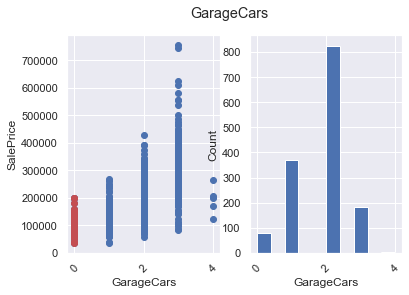

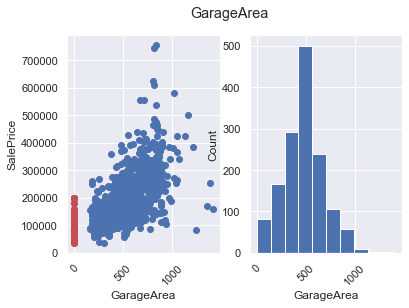

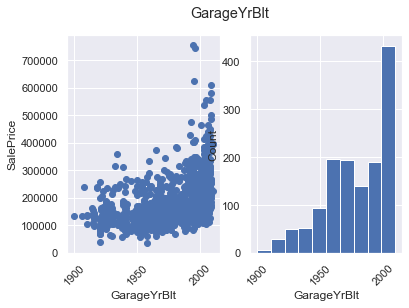

In [75]:
# lets look at these garage numerical variables 
garg_nvars = ['GarageCars', 
             'GarageArea',
             'GarageYrBlt']     

for nvar in garg_nvars:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='b')
    
    # -------------------------------------------------------------------------------
    # Plotting the "no garage" rows to examine if these variables exhibit ZEROs
    # -------------------------------------------------------------------------------
    axs[0].scatter(train0.loc[No_Garg_rows,nvar],train0.loc[No_Garg_rows,'SalePrice'],
                  color='r')

    print(nvar, 'indices with samples > 0', No_Garg_rows[np.where(train0.loc[No_Garg_rows, nvar]>0)])
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

In [76]:
print(np.where(train0['GarageType'].isna()))
train0.loc[(train0['GarageType'].isna()),'GarageType']='None'
print(np.where(train0['GarageType'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [77]:
print(np.where(train0['GarageFinish'].isna()))
train0.loc[(train0['GarageFinish'].isna()),'GarageFinish']='None'
print(np.where(train0['GarageFinish'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [78]:
print(np.where(train0['GarageQual'].isna()))
train0.loc[(train0['GarageQual'].isna()),'GarageQual']='None'
print(np.where(train0['GarageQual'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [79]:
print(np.where(train0['GarageCond'].isna()))
train0.loc[(train0['GarageCond'].isna()),'GarageCond']='None'
print(np.where(train0['GarageCond'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [80]:
print(np.where(train0['GarageYrBlt'].isna())) # Leaving these as NaNs

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)


In [81]:
# Creating a new garage variable
train0['hasGarage'] = 'Garage'
train0.loc[No_Garg_rows,'hasGarage'] = 'NoGarage'

### Electrical

In [82]:
print(train0['Electrical'].unique())

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [83]:
np.where(train0['Electrical'].isna())

(array([1379]),)

In [84]:
# remove row ??? missing electrical information 

### FireplaceQu

In [85]:
print('FireplaceQu: ', train0['FireplaceQu'].unique())

FireplaceQu:  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [86]:
print('Firepaces unique values for the NANs: ', 
      train0.loc[train0['FireplaceQu'].isna(),'Fireplaces'].unique())

Firepaces unique values for the NANs:  [0]


In [87]:
train0.loc[(train0['FireplaceQu'].isna()),
           'FireplaceQu']= 'NoFirePlace'

In [88]:
print('FireplaceQu: ', train0['FireplaceQu'].unique())

FireplaceQu:  ['NoFirePlace' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


### Fence

In [89]:
print('Fence: ', train0['Fence'].unique())

Fence:  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [90]:
train0.loc[(train0['Fence'].isna()),'Fence']= 'NoFence'

In [91]:
print('Fence: ', train0['Fence'].unique())

Fence:  ['NoFence' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


### MiscFeature

In [92]:
print('MiscFeature: ', train0['MiscFeature'].unique())

MiscFeature:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [93]:
train0.loc[(train0['MiscFeature'].isna()),'MiscFeature']= 'None'

In [94]:
print('MiscFeature: ', train0['MiscFeature'].unique())

MiscFeature:  ['None' 'Shed' 'Gar2' 'Othr' 'TenC']


### Pool Variables

In [95]:
print('PoolQC: ', train0['PoolQC'].unique())
train0.loc[(train0['PoolQC'].isna()),'PoolQC']= 'NoPool'
print('PoolQC: ', train0['PoolQC'].unique())

PoolQC:  [nan 'Ex' 'Fa' 'Gd']
PoolQC:  ['NoPool' 'Ex' 'Fa' 'Gd']


In [96]:
print('Okay all the PoolArea = 0 rows, are PoolQC = NoPool')
train0.loc[train0['PoolArea']==0,'PoolQC'].unique()

Okay all the PoolArea = 0 rows, are PoolQC = NoPool


array(['NoPool'], dtype=object)

In [97]:
print('Okay all the PoolQC = NoPool rows, are Area = 0')
train0.loc[train0['PoolQC']=='NoPool','PoolArea'].unique()

Okay all the PoolQC = NoPool rows, are Area = 0


array([0])

# Checking The Missing

In [98]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train0.select_dtypes(include=numerics)
numlist = list(num_train)

# How many Missing Values?
num_train.isna().sum()

num_miss = list(num_train.columns[np.where(num_train.isna().sum() > 0)])
print('The Numerical Variables that are missing data:')
list(num_miss)

The Numerical Variables that are missing data:


['GarageYrBlt']

In [99]:
cattypes = ['O']
cat_train = train0.select_dtypes(include=cattypes)
catlist = list(cat_train)

# How many Missing Values?
cat_train.isna().sum()

cat_miss = list(cat_train.columns[np.where(cat_train.isna().sum() > 0)])
print('The Categorical Variables that are missing data:')
list(cat_miss)

The Categorical Variables that are missing data:


['BsmtFinType2', 'Electrical']

# Remove some rows and columns

In [100]:
train = train0.drop(labels=[332,1379, 
                           624,773,1230,1300,1334,
                           523,  691, 1182, 1298], 
                    axis=0).reset_index()

In [101]:
train.head()

index  Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
0      0   1         60       RL     65.00000     8450   Pave  NoAlley   
1      1   2         20       RL     80.00000     9600   Pave  NoAlley   
2      2   3         60       RL     68.00000    11250   Pave  NoAlley   
3      3   4         70       RL     60.00000     9550   Pave  NoAlley   
4      4   5         60       RL     84.00000    14260   Pave  NoAlley   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond YearBuilt  \
0       Norm     1Fam     2Story            7            5      2003   
1       Norm     1Fam     1Story            6            8      1976   
2       Norm     1Fam     2Story            7            5      2001   
3       Norm     1Fam     2Story            7            5      1915   
4       Norm     1Fam     2Story            8            5      2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0   196.00000        Gd        TA      PConc       Gd       TA           No   
1     0.00000        TA        TA     CBlock       Gd       TA           Gd   
2   162.00000        Gd        TA      PConc       Gd       TA           Mn   
3     0.00000        TA        TA     BrkTil       TA       Gd           No   
4   350.00000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu  \
0             1          Gd             8        Typ           0  NoFirePlace   
1             1          TA             6        Typ           1           TA   
2             1          Gd             6        Typ           1    

In [102]:
# Remove these, accounted for them with other AgeHome, YrsSinceRemodel, AgeGarage
train = train.drop('YearBuilt', axis=1)
train = train.drop('YearRemodAdd', axis=1)
train = train.drop('GarageYrBlt', axis=1)

train = train.drop('FullBath', axis=1)
train = train.drop('HalfBath', axis=1)

In [103]:
train.shape[0]

1449

# Re-Plot Categorical & Numerical Variables 

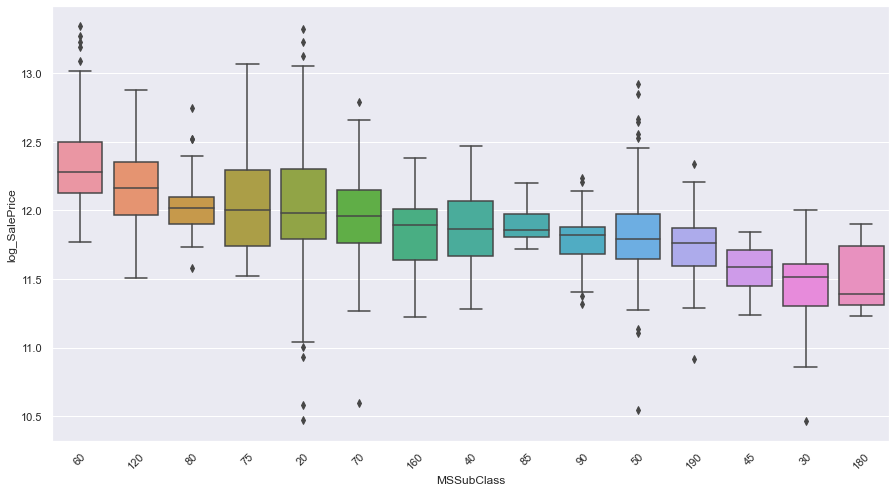

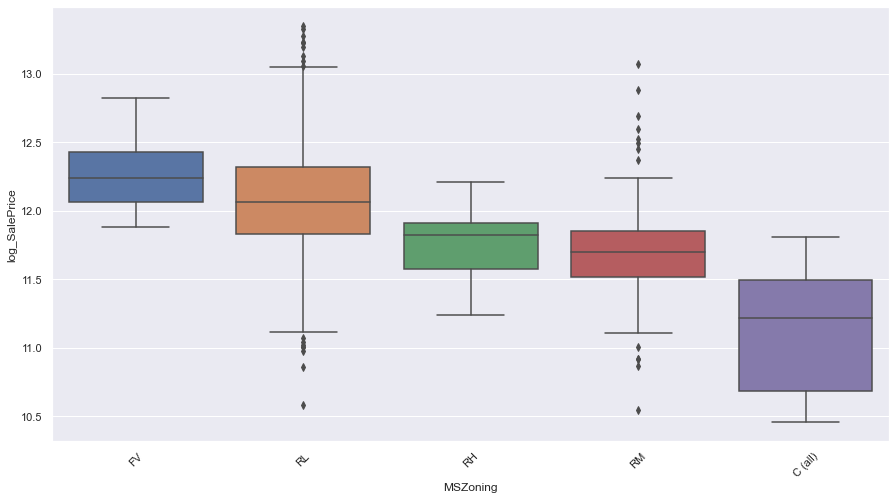

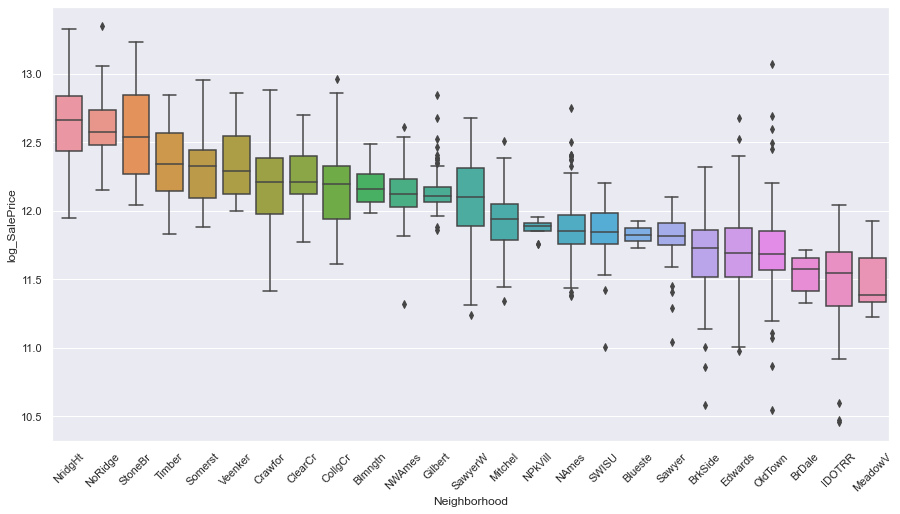

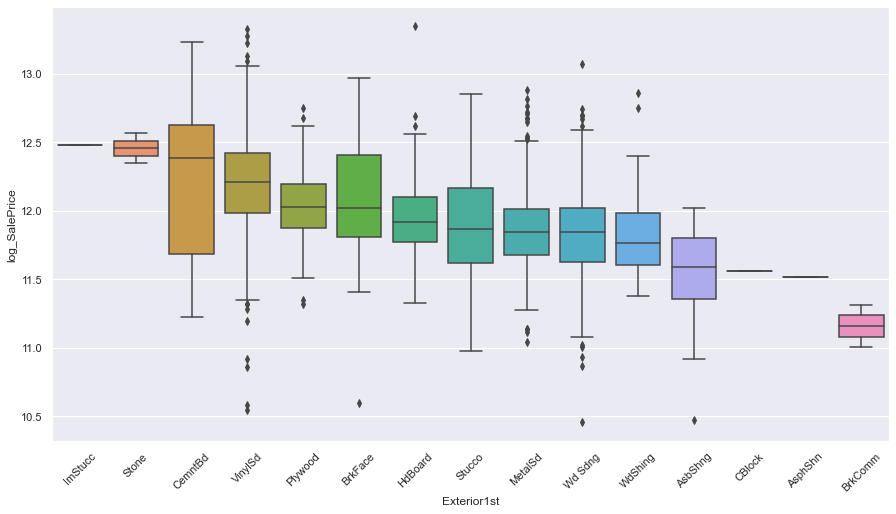

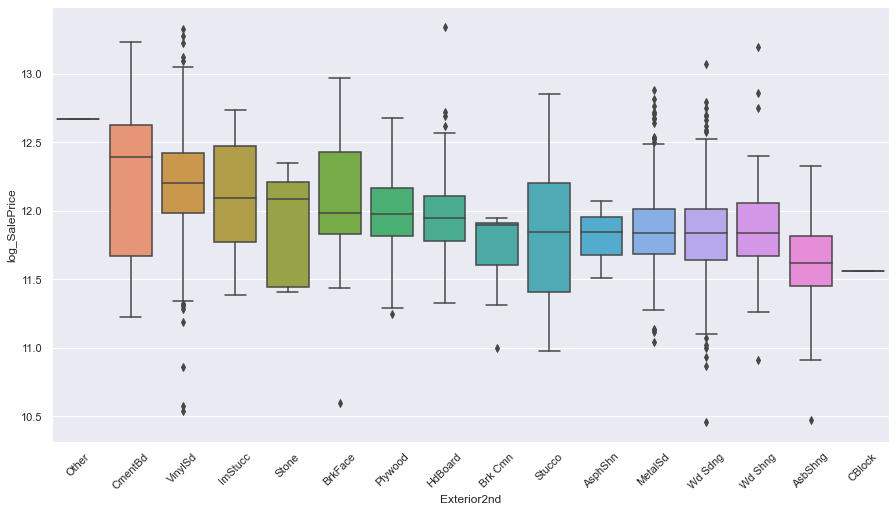

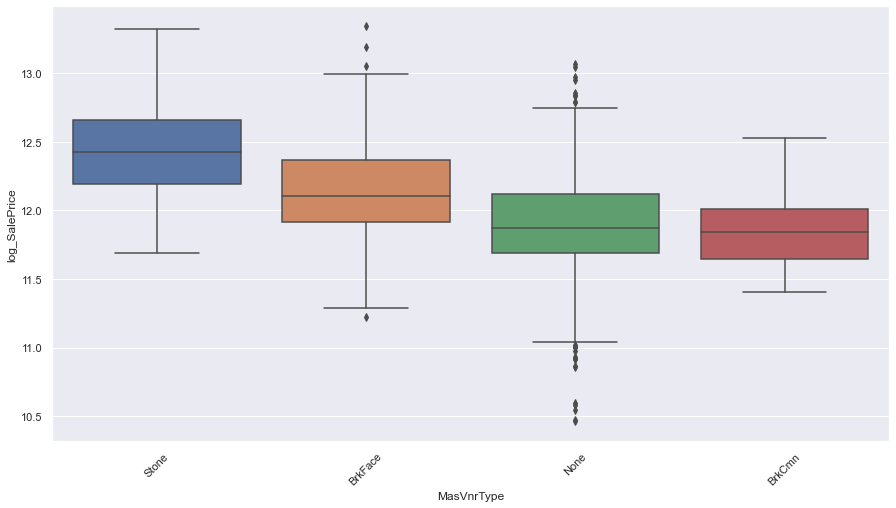

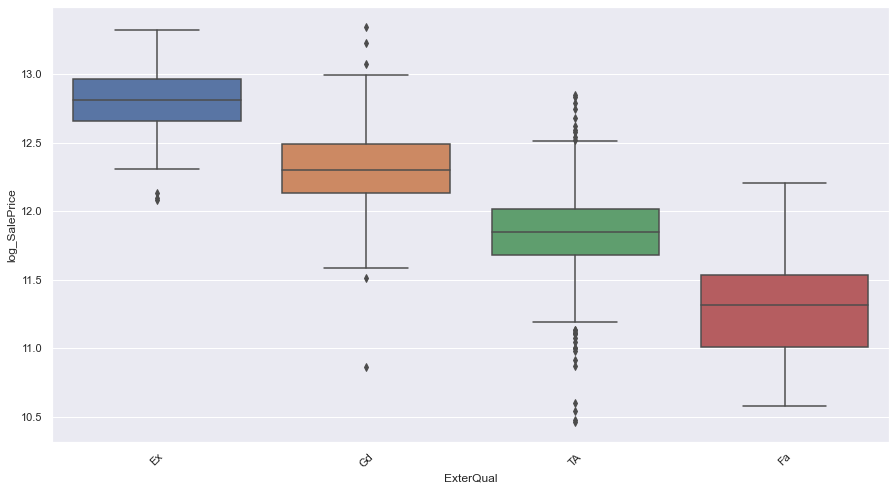

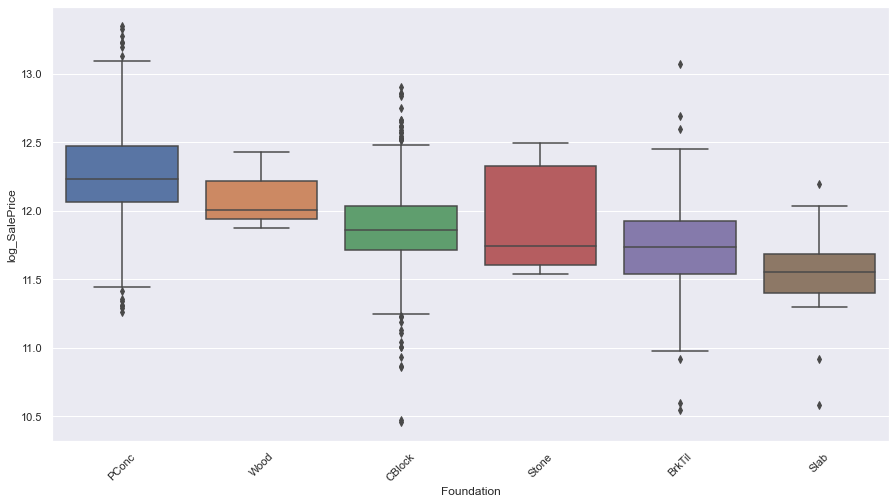

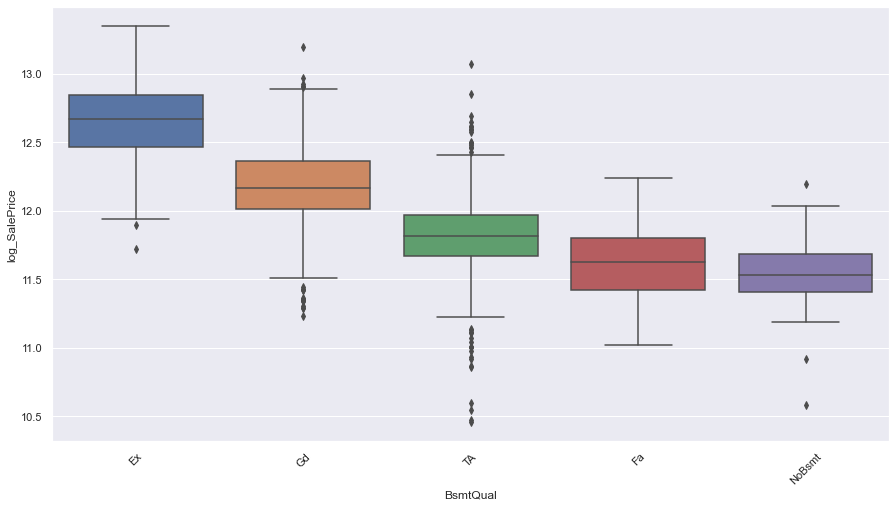

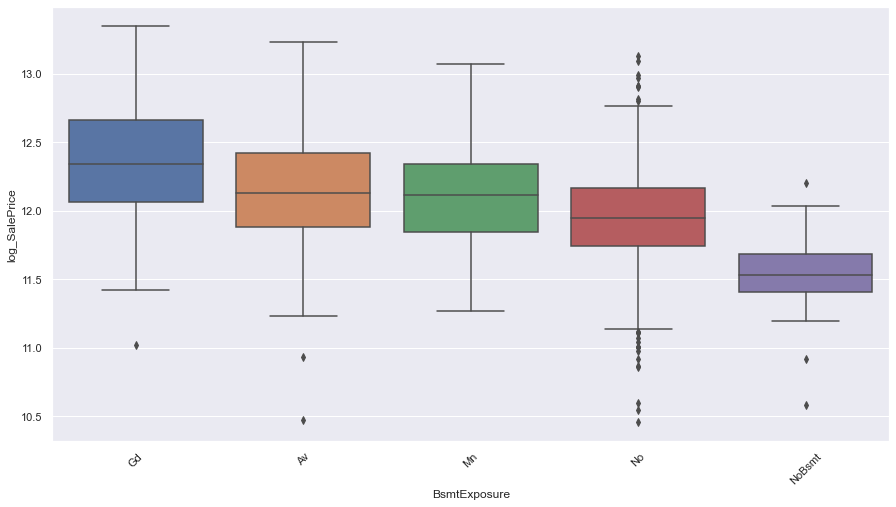

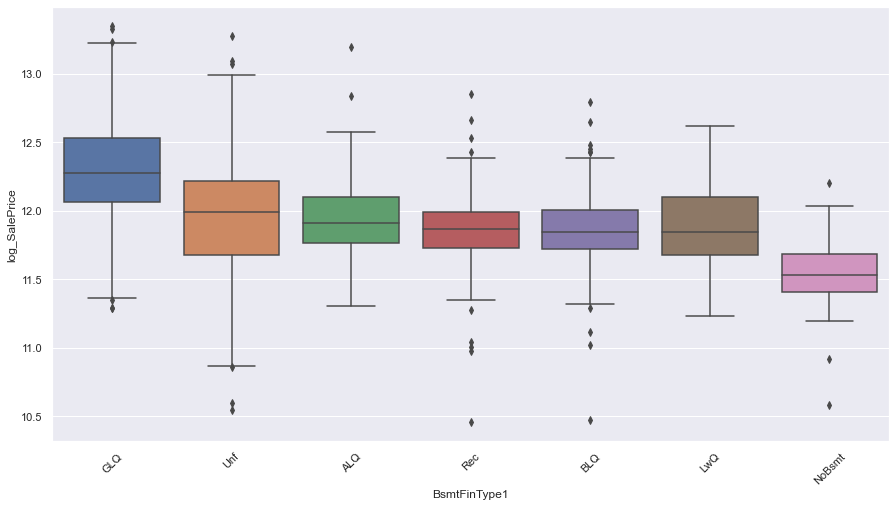

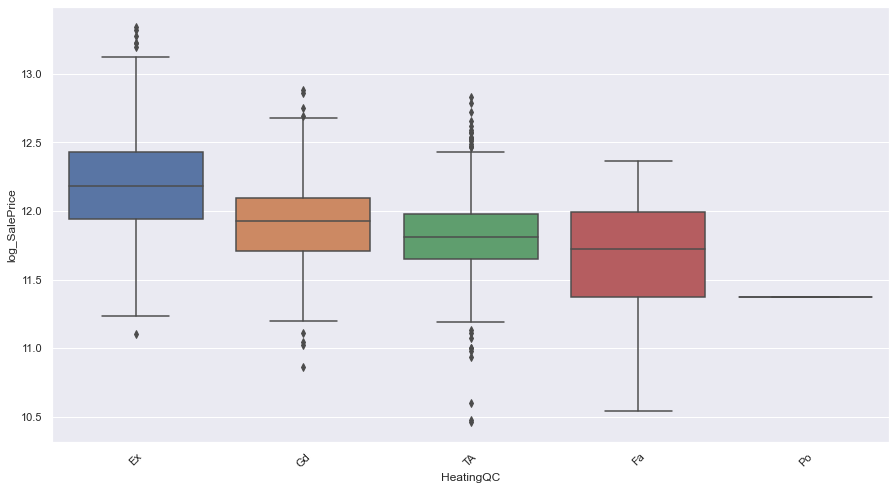

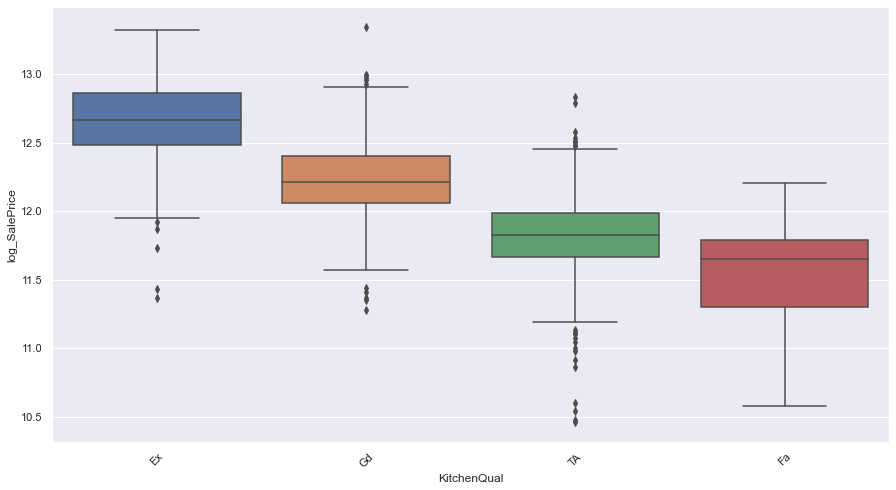

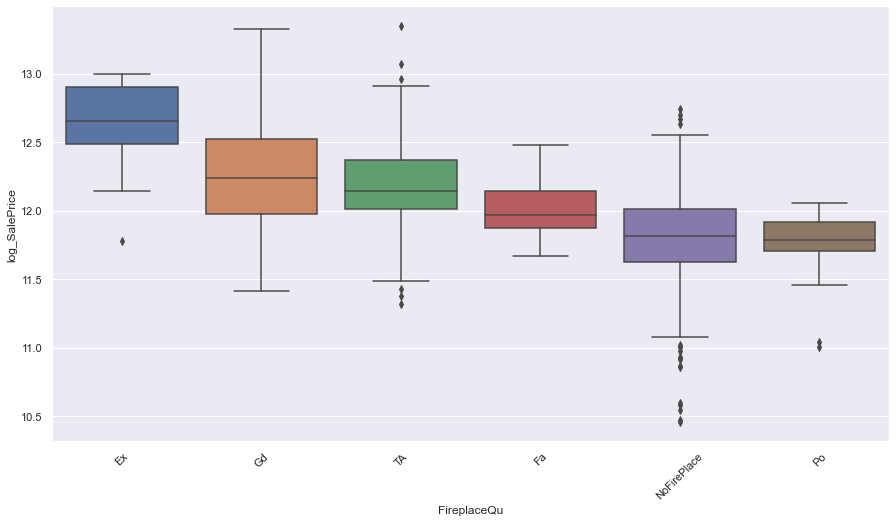

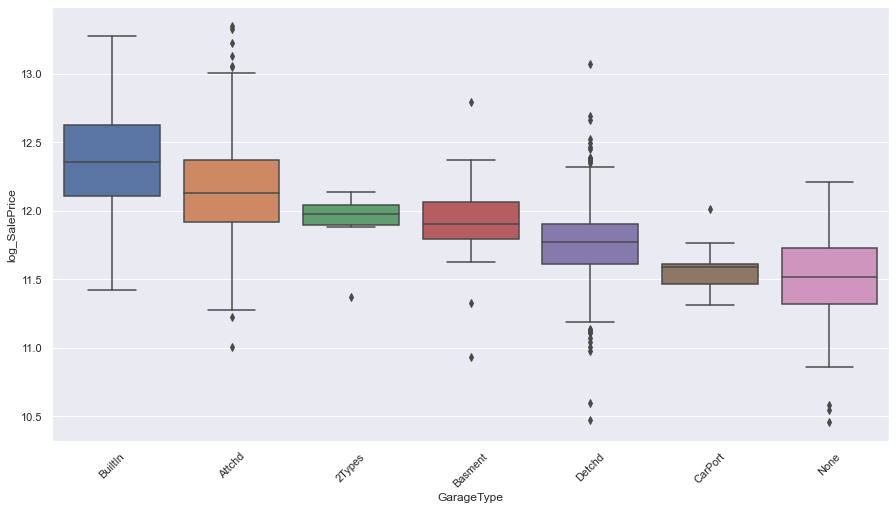

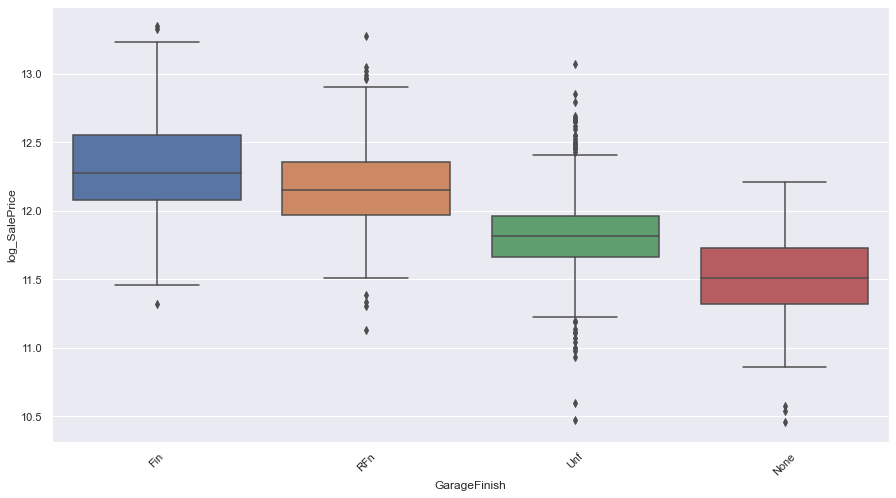

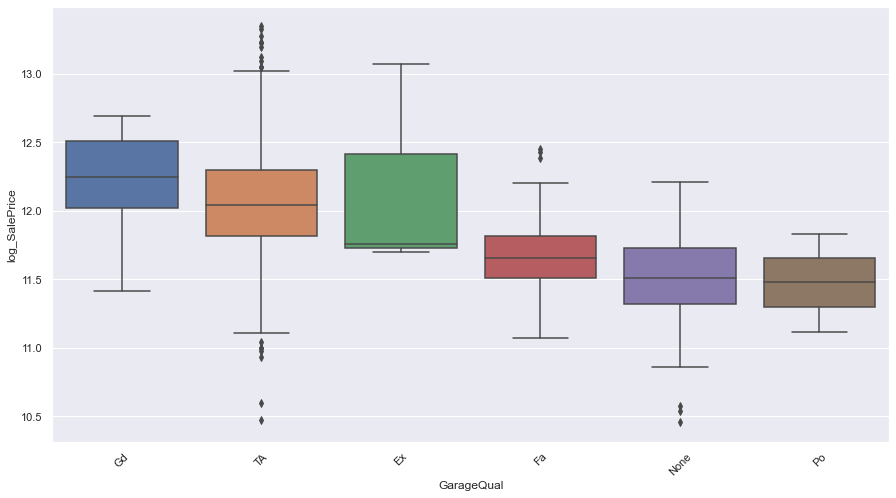

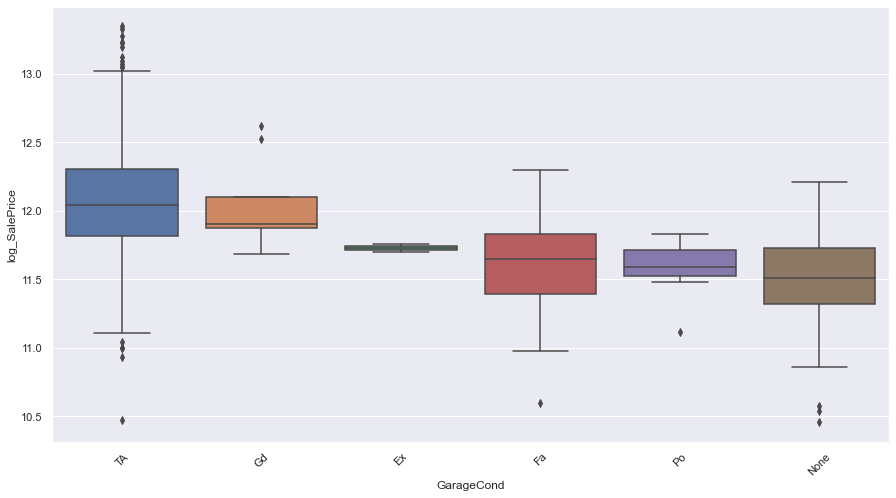

In [104]:
catlist = list(train.select_dtypes(include=cattypes))
c_pvalues = []
c_eff_sizes = []

for cvar in catlist:   
    # Running a between groups ANOVA
    mstr = 'log_SalePrice ~ ' + cvar
    mod = ols(mstr,data=train).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    eff_size_temp = (aov_table['sum_sq'][0])/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    
    c_pvalues.append(aov_table['PR(>F)'][0])
    c_eff_sizes.append(eff_size_temp)
    
    # ---------------------------------
    # The Figure
    # ---------------------------------
    sns.set(rc={'figure.facecolor':'white'})

    # Ordering by median
    temp = train.groupby([cvar])['log_SalePrice'].median().sort_values(ascending=False).reset_index()   
    
    # Boxplot
    if aov_table['PR(>F)'][0] < 0.01 and eff_size_temp > 0.138:
        plt.figure(figsize = (15,8))   
        with sns.axes_style("darkgrid"):
            sns.boxplot(x=train[cvar], 
                y=train['log_SalePrice'],
                order = list(temp[cvar]))      
    
    plt.xticks(rotation=45)

In [105]:
# Combine the p-values and effect sizes:
zipped = list(zip(catlist,
                 c_pvalues, 
                 c_eff_sizes))

cat_results = pd.DataFrame(zipped, columns=['cat var',
                                       'anova_pvalues',
                                       'effect_sizes'])

print('Only presenting the variables that have ')
print('Anova p-values < 0.01 and effect sizes > 0.138')

pd.options.display.float_format = '{:,.5f}'.format

cat_results_sorted = cat_results.sort_values('anova_pvalues', ascending = True)
cat_results_sorted.loc[cat_results_sorted['effect_sizes'] > 0.138]

Only presenting the variables that have 
Anova p-values < 0.01 and effect sizes > 0.138


cat var  anova_pvalues  effect_sizes
9   Neighborhood        0.00000       0.57050
19     ExterQual        0.00000       0.46368
22      BsmtQual        0.00000       0.45102
31   KitchenQual        0.00000       0.44670
35  GarageFinish        0.00000       0.38288
34    GarageType        0.00000       0.34003
0     MSSubClass        0.00000       0.33109
33   FireplaceQu        0.00000       0.30792
21    Foundation        0.00000       0.30380
28     HeatingQC        0.00000       0.23386
25  BsmtFinType1        0.00000       0.22478
18    MasVnrType        0.00000       0.19321
1       MSZoning        0.00000       0.17765
16   Exterior1st        0.00000       0.18790
17   Exterior2nd        0.00000       0.17295
37    GarageCond        0.00000       0.14717
24  BsmtExposure        0.00000       0.14284
36    GarageQual        0.00000       0.14333

<ipython-input-106-f066ea8ae8c8>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


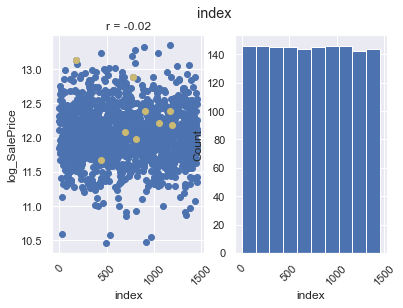

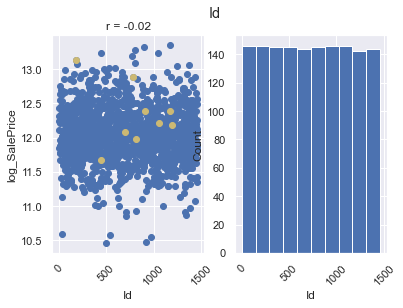

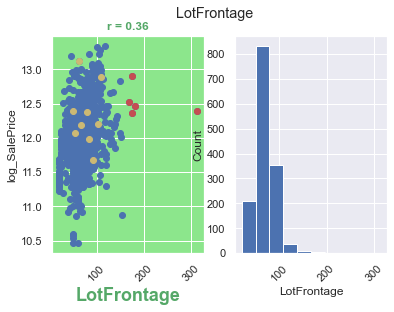

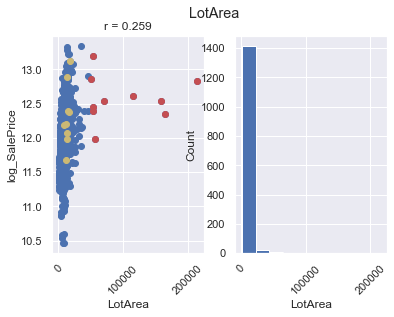

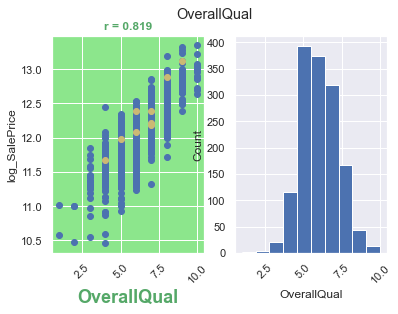

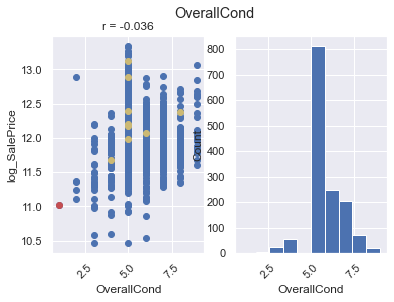

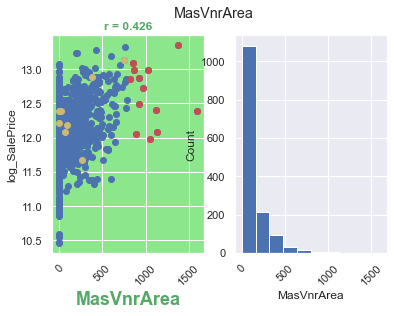

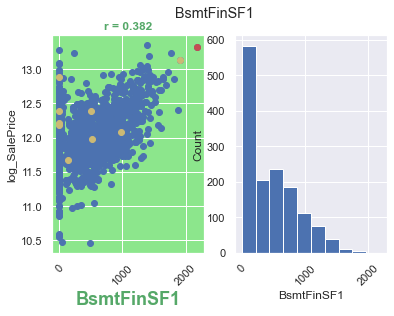

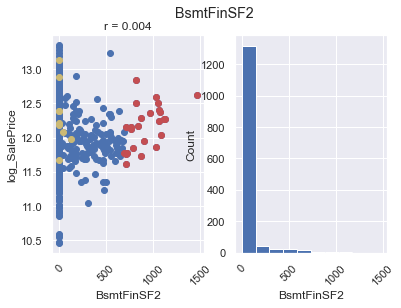

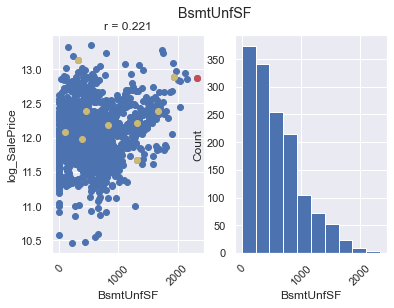

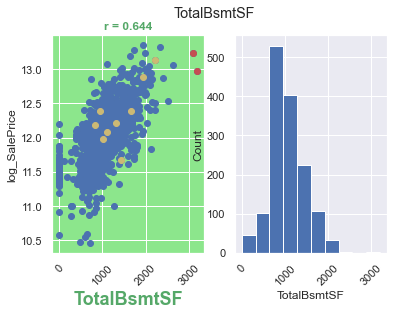

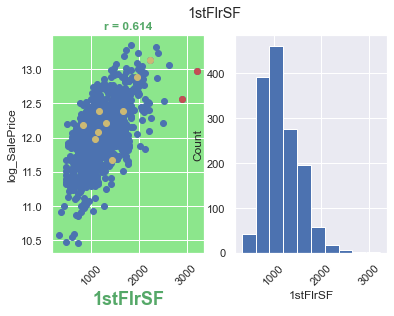

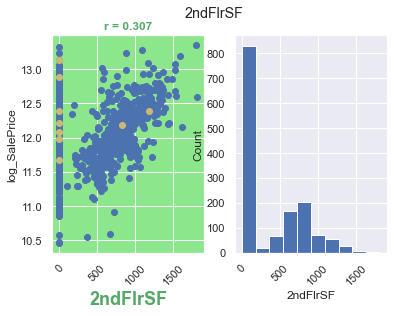

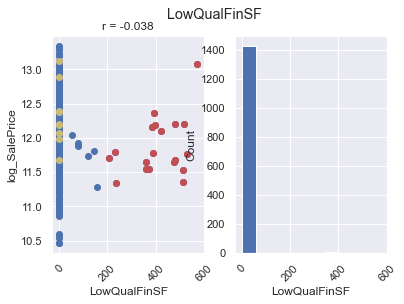

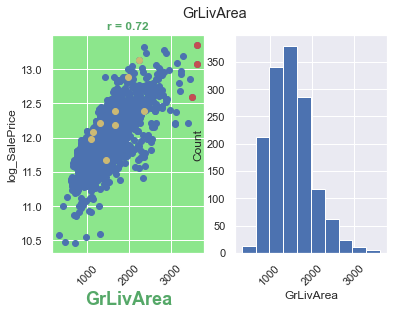

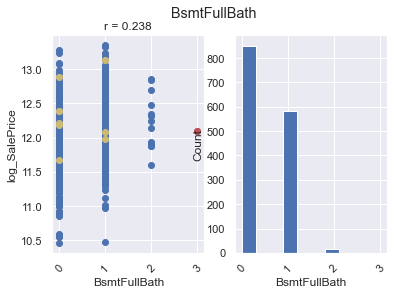

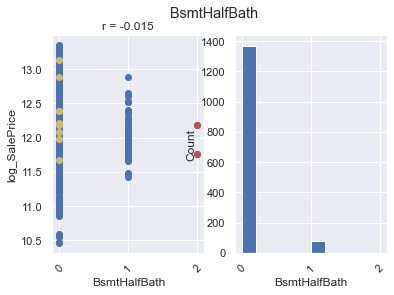

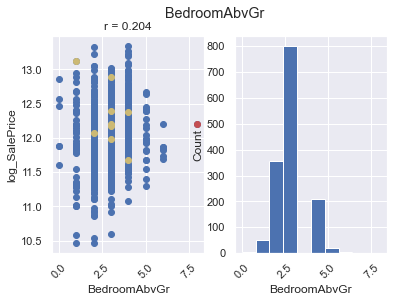

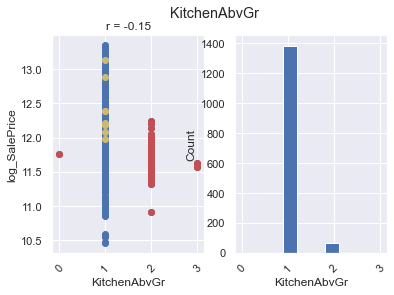

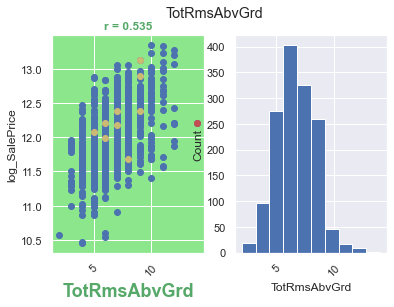

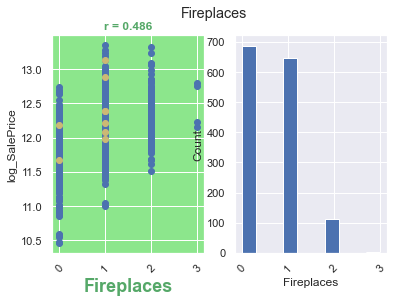

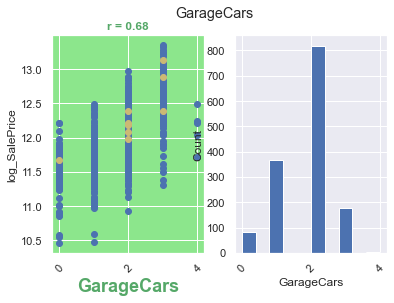

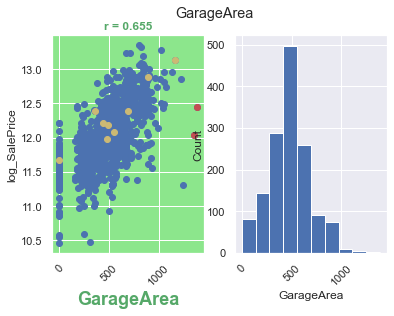

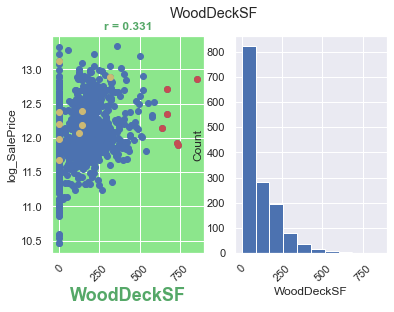

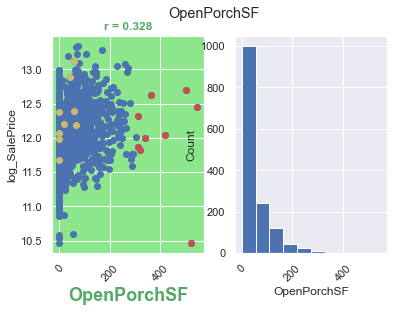

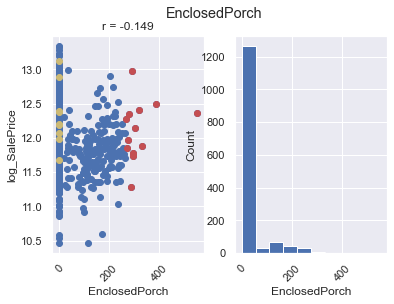

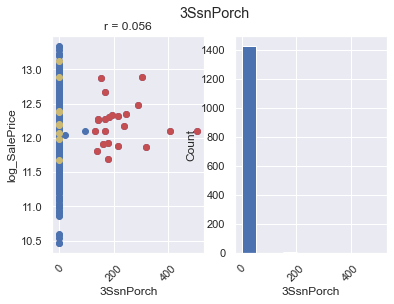

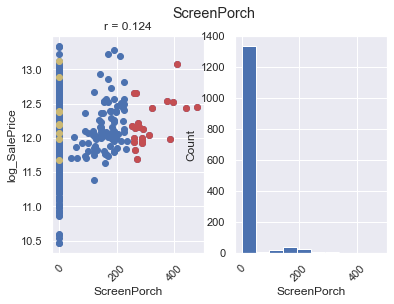

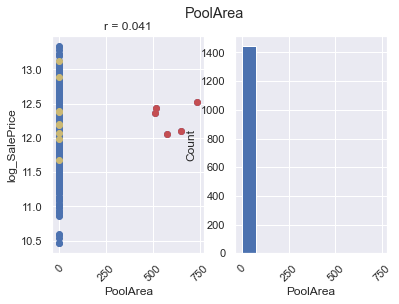

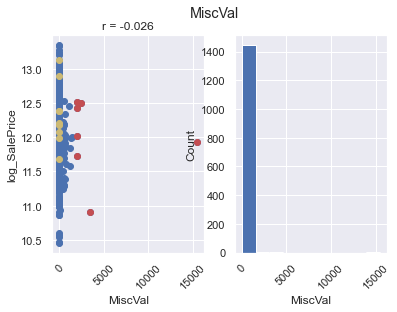

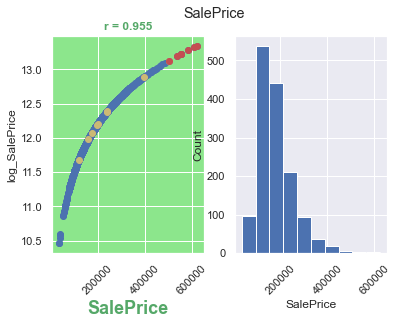

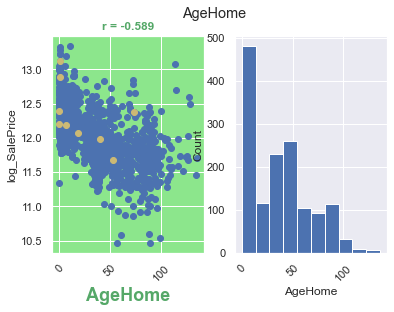

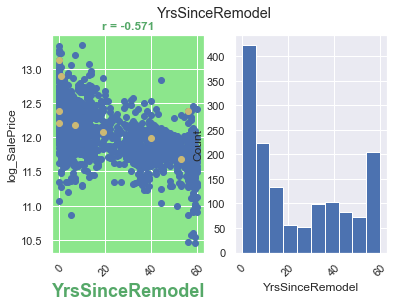

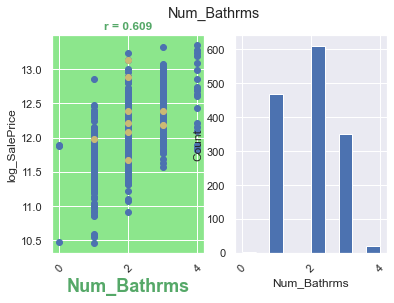

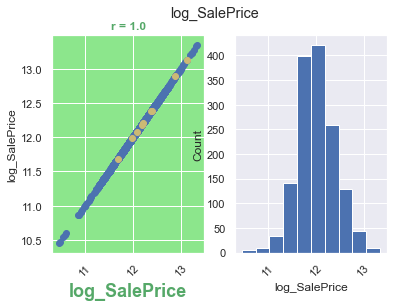

In [106]:
numlist = list(train.select_dtypes(include=numerics))

n_rcorr_values = []
# corr_thrshld = 0.3

for nvar in numlist:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Which indices have z-scores > 4
    zvals = stats.zscore(train[nvar])
    zindx = np.where(abs(zvals) > 4)

    # Scatter
    axs[0].scatter(train[nvar],train['log_SalePrice'],color='b')
    axs[0].scatter(train.loc[indx,nvar],
                   train.loc[indx,'log_SalePrice'],color='y') # *** SalePrice z-scores > 4
    axs[0].scatter(train.loc[zindx,nvar],
                   train.loc[zindx,'log_SalePrice'],color='r') # z-scores > 4

    r = ma.corrcoef(ma.masked_invalid(train[nvar]), 
                ma.masked_invalid(train['log_SalePrice']))
    
    n_rcorr_values.append(r[0,1])
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        axs[0].set_xlabel(nvar, fontsize = 18, fontweight = 'bold',color='g')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        axs[0].set_xlabel(nvar)
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('log_SalePrice')

In [107]:
# Combine the var names and correlations values:
n_rcorr_values_abs = np.abs(n_rcorr_values)
zipped = list(zip(numlist,
                 n_rcorr_values,
                 n_rcorr_values_abs))

num_results = pd.DataFrame(zipped, columns=['num var',
                                       'corr value',
                                       'corr magnitude'])

pd.options.display.float_format = '{:,.5f}'.format

print('Only presenting the variables that have correlation')
print('coefficients (absolute value) > corr_thrshld')

num_results_sorted = num_results.sort_values('corr magnitude', ascending = False)
num_results_sorted.loc[num_results_sorted['corr magnitude']>corr_thrshld]

Only presenting the variables that have correlation
coefficients (absolute value) > corr_thrshld


num var  corr value  corr magnitude
34    log_SalePrice     1.00000         1.00000
30        SalePrice     0.95454         0.95454
4       OverallQual     0.81937         0.81937
14        GrLivArea     0.71961         0.71961
21       GarageCars     0.68005         0.68005
22       GarageArea     0.65460         0.65460
10      TotalBsmtSF     0.64399         0.64399
11         1stFlrSF     0.61358         0.61358
33      Num_Bathrms     0.60912         0.60912
31          AgeHome    -0.58930         0.58930
32  YrsSinceRemodel    -0.57080         0.57080
19     TotRmsAbvGrd     0.53479         0.53479
20       Fireplaces     0.48639         0.48639
6        MasVnrArea     0.42612         0.42612
7        BsmtFinSF1     0.38243         0.38243
2       LotFrontage     0.36035         0.36035
23       WoodDeckSF     0.33145         0.33145
24      OpenPorchSF     0.32835         0.32835
12         2ndFlrSF     0.30732         0.30732

# Save Train Dataset

In [108]:
train.to_csv('./Data/train_clean.csv')